In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Network_anomaly_data.csv')
df['is_attack'] = df['attack'].apply(lambda x: 'normal' if x=='normal' else 'attack')
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,rootshell,suattempted,numroot,numfilecreations,numshells,numaccessfiles,numoutboundcmds,ishostlogin,isguestlogin,count,srvcount,serrorrate,srvserrorrate,rerrorrate,srvrerrorrate,samesrvrate,diffsrvrate,srvdiffhostrate,dsthostcount,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag,is_attack
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21,normal


In [5]:
df['dsthostcount'].value_counts()

,count
dsthostcount,
255,74099
1,3119
2,2733
3,1280
4,1198
...,...
252,77
243,76
226,76


<Axes: xlabel='dsthostcount', ylabel='Density'>

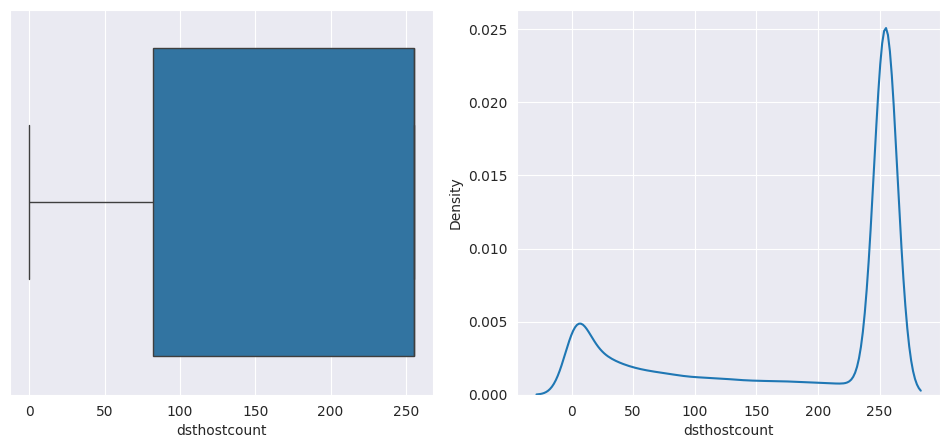

In [6]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostcount')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostcount')

<Axes: xlabel='count', ylabel='Density'>

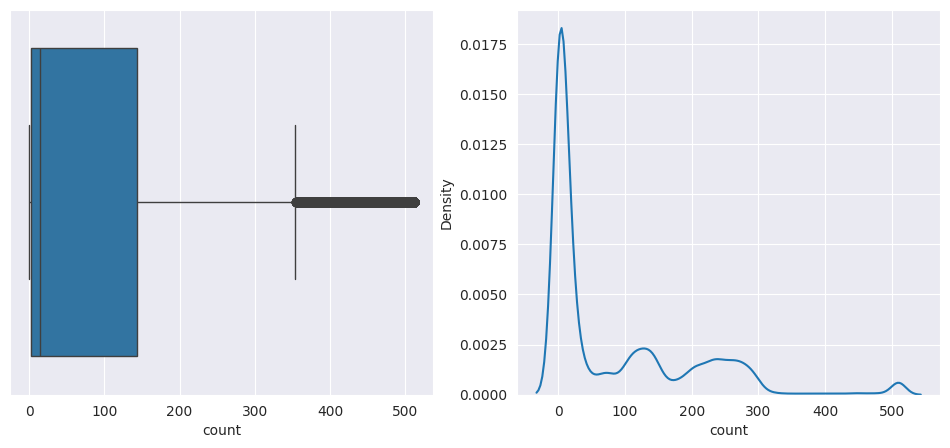

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='count')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='count')

In [8]:
pd.DataFrame(df['dsthostcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostcount,125973.0,182.148945,99.206213,0.0,82.0,255.0,255.0,255.0


In [9]:
IQR = np.percentile(df['dsthostcount'],75)-np.percentile(df['dsthostcount'],25)
ulimit = np.percentile(df['dsthostcount'],75) + 1.5*IQR
ulimit

514.5

In [10]:
not_outlier = df[df['dsthostcount'] <= ulimit]
is_outlier = df[df['dsthostcount'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(100.0, 0.0)

In [11]:
df[df['count'] <= df['dsthostcount']].shape

(112151, 44)

In [12]:
dhf = df.copy()
dhf['attk'] = dhf['attack'].apply(lambda x: 0 if x == 'normal' else 1)
dhf['bins'] = None
for i in range(len(dhf)):
  count = dhf.loc[i,'dsthostcount']
  if count > 0 and count <= 50:
    dhf.loc[i,'bins'] = 1
  elif count> 50 and count <= 100:
    dhf.loc[i,'bins'] = 2
  elif count> 100 and count <= 150:
    dhf.loc[i,'bins'] = 3
  elif count > 150 and count <= 200:
    dhf.loc[i,'bins'] = 4
  else:
    dhf.loc[i,'bins'] = 5

In [13]:
dhf['bins'].value_counts()

,count
bins,
5,79061
1,25196
2,9282
3,6765
4,5669


In [14]:
pd.pivot_table(data=dhf,index='bins',columns='is_attack',values='attk',aggfunc='count')

is_attack,attack,normal
bins,,
1,6008,19188
2,1068,8214
3,997,5768
4,1084,4585
5,49473,29588


In [15]:
pd.pivot_table(data=dhf[dhf['attack']!='normal'],index='attack',columns='bins',values='attk',aggfunc='count').sort_values(1,ascending=False)

bins,1,2,3,4,5
attack,,,,,
ipsweep,3451.0,146.0,2.0,NaN,NaN
nmap,1072.0,97.0,99.0,95.0,130.0
warezclient,544.0,NaN,24.0,30.0,292.0
neptune,411.0,425.0,432.0,422.0,39524.0
back,196.0,199.0,100.0,98.0,363.0
pod,123.0,16.0,4.0,NaN,58.0
guess_passwd,51.0,2.0,NaN,NaN,NaN
smurf,43.0,52.0,103.0,142.0,2306.0
buffer_overflow,30.0,NaN,NaN,NaN,NaN


In [16]:
pd.pivot_table(data=dhf[dhf['attack']!='normal'],index='attack',columns='bins',values='attk',aggfunc='count').sort_values(2,ascending=False)

bins,1,2,3,4,5
attack,,,,,
neptune,411.0,425.0,432.0,422.0,39524.0
back,196.0,199.0,100.0,98.0,363.0
ipsweep,3451.0,146.0,2.0,NaN,NaN
nmap,1072.0,97.0,99.0,95.0,130.0
portsweep,3.0,64.0,129.0,209.0,2526.0
smurf,43.0,52.0,103.0,142.0,2306.0
satan,13.0,39.0,55.0,67.0,3459.0
teardrop,NaN,27.0,49.0,21.0,795.0
pod,123.0,16.0,4.0,NaN,58.0


In [17]:
pd.pivot_table(data=dhf[dhf['attack']!='normal'],index='attack',columns='bins',values='attk',aggfunc='count').sort_values(3,ascending=False)

bins,1,2,3,4,5
attack,,,,,
neptune,411.0,425.0,432.0,422.0,39524.0
portsweep,3.0,64.0,129.0,209.0,2526.0
smurf,43.0,52.0,103.0,142.0,2306.0
back,196.0,199.0,100.0,98.0,363.0
nmap,1072.0,97.0,99.0,95.0,130.0
satan,13.0,39.0,55.0,67.0,3459.0
teardrop,NaN,27.0,49.0,21.0,795.0
warezclient,544.0,NaN,24.0,30.0,292.0
pod,123.0,16.0,4.0,NaN,58.0


In [18]:
pd.pivot_table(data=dhf[dhf['attack']!='normal'],index='attack',columns='bins',values='attk',aggfunc='count').sort_values(4,ascending=False)

bins,1,2,3,4,5
attack,,,,,
neptune,411.0,425.0,432.0,422.0,39524.0
portsweep,3.0,64.0,129.0,209.0,2526.0
smurf,43.0,52.0,103.0,142.0,2306.0
back,196.0,199.0,100.0,98.0,363.0
nmap,1072.0,97.0,99.0,95.0,130.0
satan,13.0,39.0,55.0,67.0,3459.0
warezclient,544.0,NaN,24.0,30.0,292.0
teardrop,NaN,27.0,49.0,21.0,795.0
buffer_overflow,30.0,NaN,NaN,NaN,NaN


In [19]:
pd.pivot_table(data=dhf[dhf['attack']!='normal'],index='attack',columns='bins',values='attk',aggfunc='count').sort_values(5,ascending=False)

bins,1,2,3,4,5
attack,,,,,
neptune,411.0,425.0,432.0,422.0,39524.0
satan,13.0,39.0,55.0,67.0,3459.0
portsweep,3.0,64.0,129.0,209.0,2526.0
smurf,43.0,52.0,103.0,142.0,2306.0
teardrop,NaN,27.0,49.0,21.0,795.0
back,196.0,199.0,100.0,98.0,363.0
warezclient,544.0,NaN,24.0,30.0,292.0
nmap,1072.0,97.0,99.0,95.0,130.0
pod,123.0,16.0,4.0,NaN,58.0


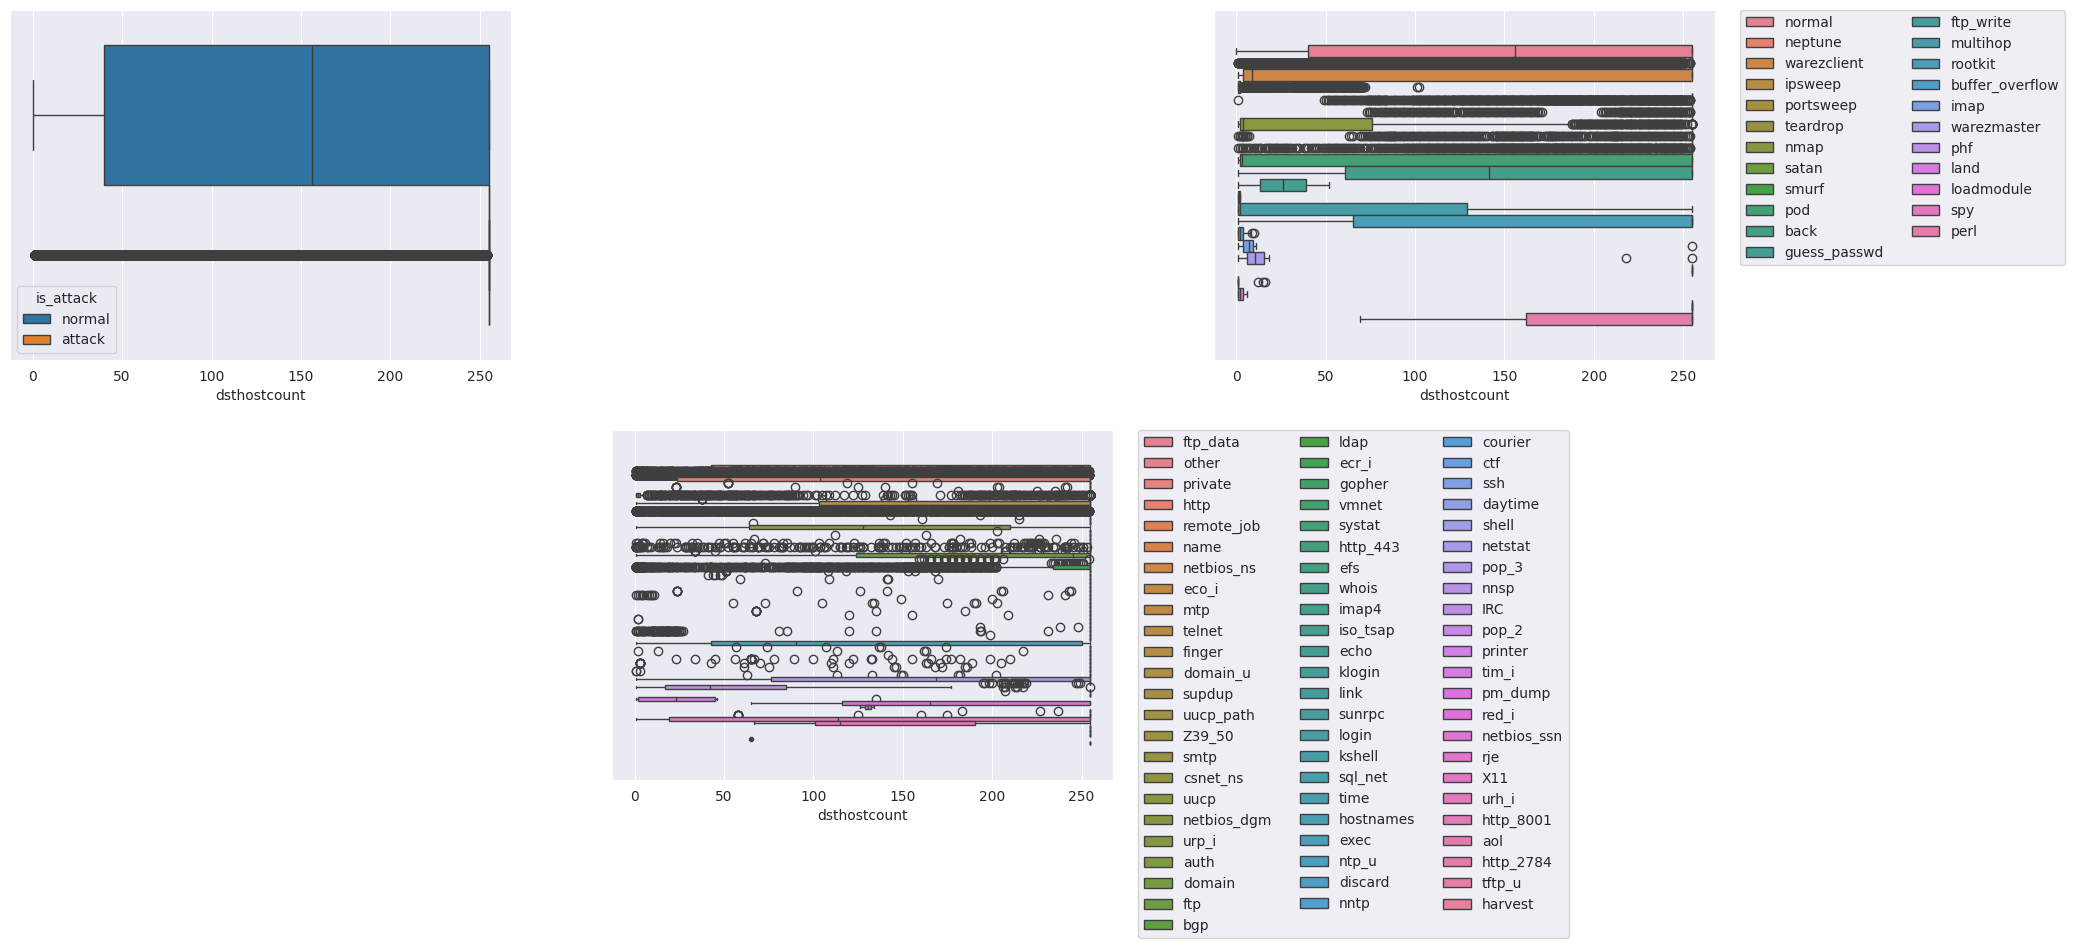

In [20]:
plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
sns.boxplot(data=dhf,x='dsthostcount',hue='is_attack')
plt.subplot(2,3,3)
sns.boxplot(data=dhf,x='dsthostcount',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=2)
plt.subplot(2,3,5)
sns.boxplot(data=dhf,x='dsthostcount',hue='service')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [21]:
df['dsthostsrvcount'].value_counts()

,count
dsthostsrvcount,
255,35993
1,8449
2,5161
3,2768
4,2488
...,...
222,71
188,70
221,70


In [22]:
np.percentile(df['dsthostsrvcount'],75),np.percentile(df['dsthostsrvcount'],50),np.percentile(df['dsthostsrvcount'],25)

(255.0, 63.0, 10.0)

In [23]:
pd.DataFrame(df['dsthostsrvcount'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvcount,125973.0,115.653005,110.702741,0.0,10.0,63.0,255.0,255.0


In [24]:
IQR = np.percentile(df['dsthostsrvcount'],75)-np.percentile(df['dsthostsrvcount'],25)
ulimit = np.percentile(df['dsthostsrvcount'],75)+ (1.5*IQR)
ulimit

622.5

In [25]:
not_outlier = df[df['dsthostsrvcount'] <= ulimit]
is_outlier = df[df['dsthostsrvcount'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(100.0, 0.0)

<Axes: xlabel='dsthostsrvcount', ylabel='Density'>

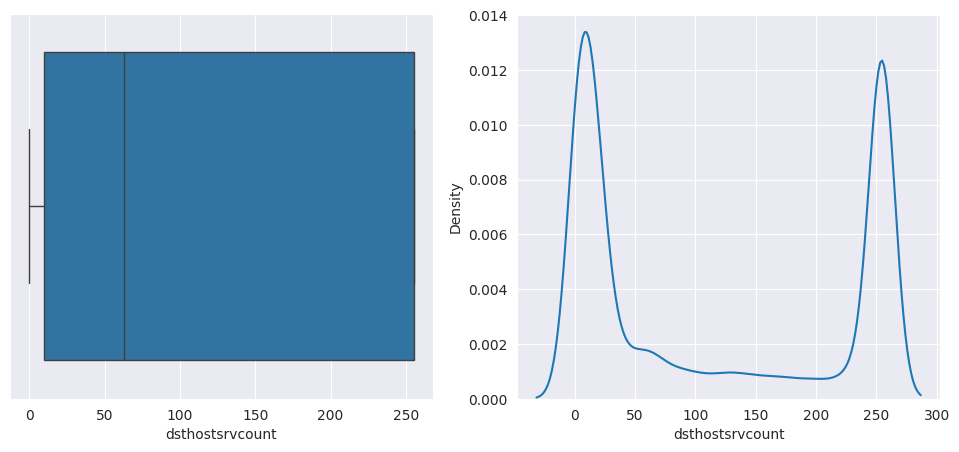

In [26]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsrvcount')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostsrvcount')

In [27]:
dhsdf = df.copy()
dhsdf['attk'] = dhsdf['attack'].apply(lambda x: 0 if x == 'normal' else 1)
dhsdf['bins'] = None
for i in range(len(dhsdf)):
  count = dhsdf.loc[i,'dsthostsrvcount']
  if count > 0 and count <= 50:
    dhsdf.loc[i,'bins'] = 1
  elif count> 50 and count <= 100:
    dhsdf.loc[i,'bins'] = 2
  elif count> 100 and count <= 150:
    dhsdf.loc[i,'bins'] = 3
  elif count > 150 and count <= 200:
    dhsdf.loc[i,'bins'] = 4
  else:
    dhsdf.loc[i,'bins'] = 5

In [28]:
dhsdf['bins'].value_counts()

,count
bins,
1,60063
5,46117
2,8964
3,5826
4,5003


In [29]:
pd.pivot_table(data=dhsdf,index='bins',columns='is_attack',values='attk',aggfunc='count')

is_attack,attack,normal
bins,,
1,49536,10527
2,4322,4642
3,1598,4228
4,1149,3854
5,2025,44092


In [30]:
pd.pivot_table(data=dhsdf[dhsdf['attack'] != 'normal'],index='attack',columns='bins',values='attk',aggfunc='count',margins=True).reset_index().sort_values('All',ascending=False)

bins,attack,1,2,3,4,5,All
22,All,49536.0,4322.0,1598.0,1149.0,2025.0,58630
9,neptune,39392.0,1726.0,92.0,4.0,NaN,41214
16,satan,3346.0,89.0,86.0,75.0,37.0,3633
5,ipsweep,1437.0,1021.0,564.0,251.0,326.0,3599
14,portsweep,2909.0,12.0,5.0,2.0,3.0,2931
17,smurf,376.0,385.0,379.0,381.0,1125.0,2646
10,nmap,536.0,307.0,237.0,246.0,167.0,1493
0,back,196.0,199.0,100.0,98.0,363.0,956
19,teardrop,393.0,416.0,49.0,34.0,NaN,892
20,warezclient,645.0,159.0,86.0,NaN,NaN,890


In [31]:
pd.pivot_table(data=dhsdf[dhsdf['attack'] != 'normal'],index='attack',columns='bins',values='attk',aggfunc='count',margins=True).reset_index().sort_values(1,ascending=False)

bins,attack,1,2,3,4,5,All
22,All,49536.0,4322.0,1598.0,1149.0,2025.0,58630
9,neptune,39392.0,1726.0,92.0,4.0,NaN,41214
16,satan,3346.0,89.0,86.0,75.0,37.0,3633
14,portsweep,2909.0,12.0,5.0,2.0,3.0,2931
5,ipsweep,1437.0,1021.0,564.0,251.0,326.0,3599
20,warezclient,645.0,159.0,86.0,NaN,NaN,890
10,nmap,536.0,307.0,237.0,246.0,167.0,1493
19,teardrop,393.0,416.0,49.0,34.0,NaN,892
17,smurf,376.0,385.0,379.0,381.0,1125.0,2646
0,back,196.0,199.0,100.0,98.0,363.0,956


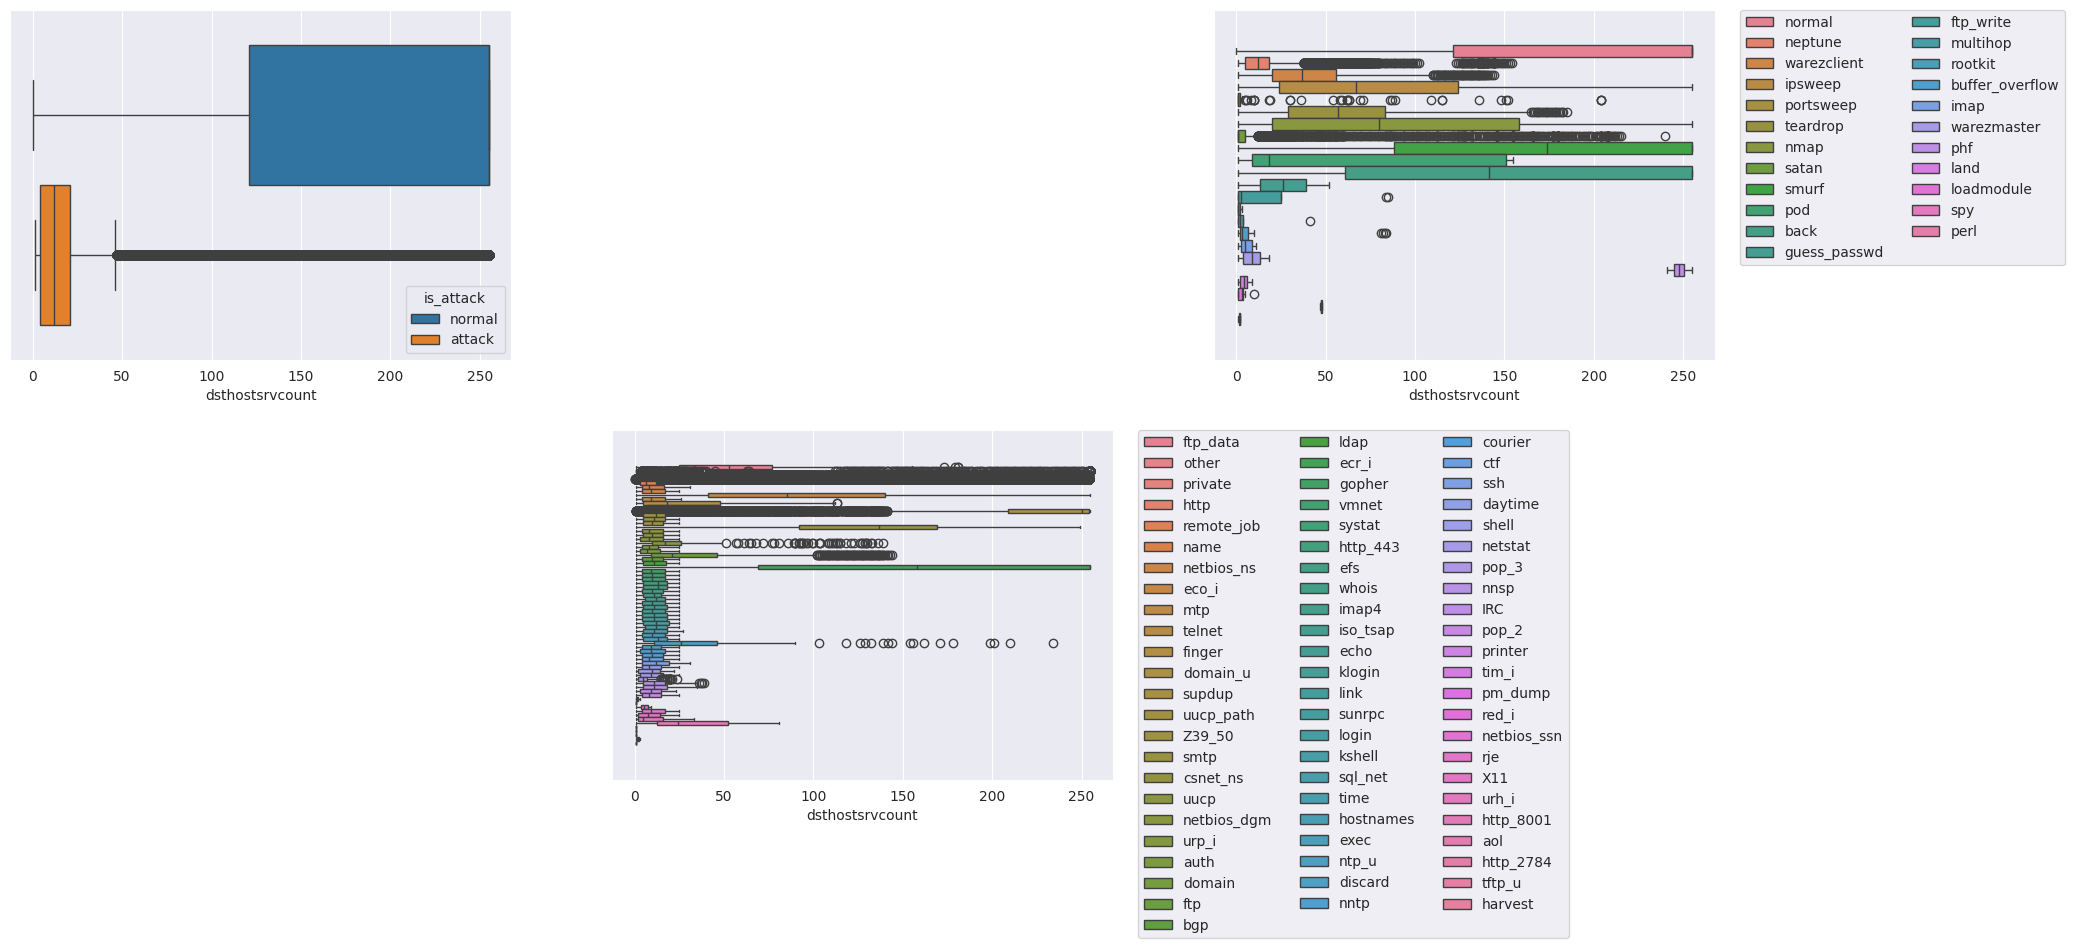

In [32]:
plt.figure(figsize=(22,10))
plt.subplot(2,3,1)
sns.boxplot(data=dhsdf,x='dsthostsrvcount',hue='is_attack')
plt.subplot(2,3,3)
sns.boxplot(data=dhsdf,x='dsthostsrvcount',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=2)
plt.subplot(2,3,5)
sns.boxplot(data=dhsdf,x='dsthostsrvcount',hue='service')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncol=3)

In [33]:
df['dsthostsamesrvrate'].value_counts()

,count
dsthostsamesrvrate,
1.00,49059
0.01,7780
0.00,6927
0.02,6593
0.07,5672
...,...
0.48,176
0.72,170
0.41,169


<Axes: xlabel='dsthostsamesrvrate', ylabel='Density'>

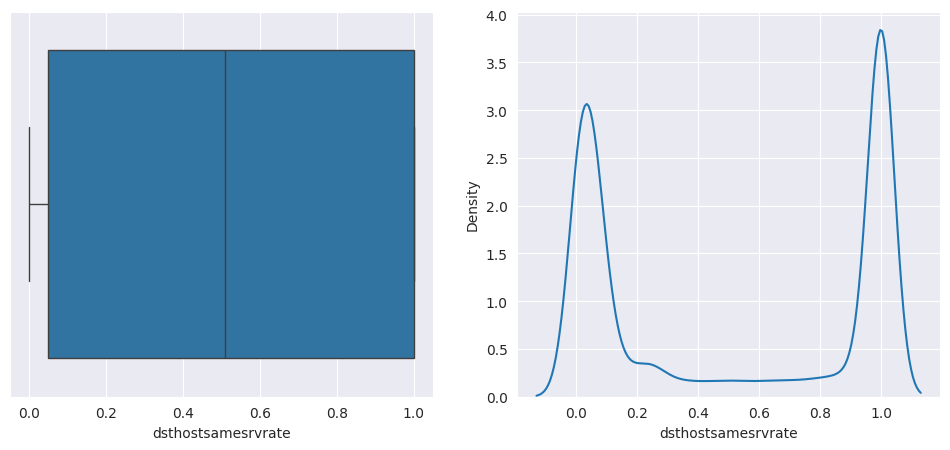

In [34]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsamesrvrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostsamesrvrate')

In [35]:
pd.DataFrame(df['dsthostsamesrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrvrate,125973.0,0.521242,0.448949,0.0,0.05,0.51,1.0,1.0


In [36]:
IQR = np.percentile(df['dsthostsamesrvrate'],75)-np.percentile(df['dsthostsamesrvrate'],25)
ulimit = np.percentile(df['dsthostsamesrvrate'],75) + 1.5*IQR
ulimit

2.425

In [37]:
not_outlier = df[df['dsthostsamesrvrate'] <= ulimit]
is_outlier = df[df['dsthostsamesrvrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(100.0, 0.0)

In [38]:
# attacks when greater than 50%
df[df['dsthostsamesrvrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
normal,55050
attack,8437


In [39]:
# attacks when less than 50%
df[df['dsthostsamesrvrate']<0.5]['is_attack'].value_counts()

,count
is_attack,
attack,50193
normal,12293


In [40]:
dhssdf = df.copy()
# bin the data into 4 groups
dhssdf['bins'] = None
for i in range(len(dhssdf)):
  ser = dhssdf.loc[i,'dsthostsamesrvrate']
  if ser < 0.25:
    dhssdf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhssdf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhssdf.loc[i,'bins'] = 3
  else:
    dhssdf.loc[i,'bins'] = 4

In [41]:
dhssdf['bins'].value_counts()

,count
bins,
4,58161
1,56088
2,6398
3,5326


In [42]:
# number of attacks across each bin
pd.pivot_table(data=dhssdf,index='bins',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
bins,,
1,47875,8213
2,2318,4080
3,875,4451
4,7562,50599


In [43]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhssdf[dhssdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,39774.0,1220.0,130.0,90.0
satan,3369.0,97.0,117.0,50.0
portsweep,2914.0,8.0,4.0,5.0
teardrop,449.0,356.0,87.0,NaN
ipsweep,442.0,25.0,12.0,3120.0
smurf,369.0,437.0,457.0,1383.0
nmap,305.0,2.0,6.0,1180.0
warezclient,155.0,169.0,35.0,531.0
pod,78.0,3.0,23.0,97.0


In [44]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhssdf[dhssdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,39774.0,1220.0,130.0,90.0
smurf,369.0,437.0,457.0,1383.0
teardrop,449.0,356.0,87.0,NaN
warezclient,155.0,169.0,35.0,531.0
satan,3369.0,97.0,117.0,50.0
ipsweep,442.0,25.0,12.0,3120.0
portsweep,2914.0,8.0,4.0,5.0
pod,78.0,3.0,23.0,97.0
nmap,305.0,2.0,6.0,1180.0


In [45]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhssdf[dhssdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
smurf,369.0,437.0,457.0,1383.0
neptune,39774.0,1220.0,130.0,90.0
satan,3369.0,97.0,117.0,50.0
teardrop,449.0,356.0,87.0,NaN
warezclient,155.0,169.0,35.0,531.0
pod,78.0,3.0,23.0,97.0
ipsweep,442.0,25.0,12.0,3120.0
nmap,305.0,2.0,6.0,1180.0
portsweep,2914.0,8.0,4.0,5.0


In [46]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhssdf[dhssdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
ipsweep,442.0,25.0,12.0,3120.0
smurf,369.0,437.0,457.0,1383.0
nmap,305.0,2.0,6.0,1180.0
back,NaN,NaN,NaN,956.0
warezclient,155.0,169.0,35.0,531.0
pod,78.0,3.0,23.0,97.0
neptune,39774.0,1220.0,130.0,90.0
guess_passwd,NaN,NaN,NaN,53.0
satan,3369.0,97.0,117.0,50.0


In [47]:
# type of service in each bin : bin 1
pd.pivot_table(data=dhssdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
service,,,,
private,19803.0,594.0,307.0,1149.0
other,3930.0,8.0,12.0,409.0
ftp_data,2844.0,2365.0,510.0,1141.0
telnet,1694.0,387.0,89.0,183.0
finger,1469.0,257.0,4.0,37.0
ftp,1182.0,454.0,78.0,40.0
http,1026.0,304.0,49.0,38959.0
auth,932.0,3.0,4.0,16.0
Z39_50,862.0,NaN,NaN,NaN


In [48]:
# type of service in each bin : bin 2
pd.pivot_table(data=dhssdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
service,,,,
ftp_data,2844.0,2365.0,510.0,1141.0
smtp,846.0,1297.0,3006.0,2164.0
private,19803.0,594.0,307.0,1149.0
ftp,1182.0,454.0,78.0,40.0
ecr_i,497.0,441.0,480.0,1659.0
telnet,1694.0,387.0,89.0,183.0
http,1026.0,304.0,49.0,38959.0
finger,1469.0,257.0,4.0,37.0
domain_u,307.0,93.0,701.0,7942.0


In [49]:
# type of service in each bin : bin 3
pd.pivot_table(data=dhssdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
service,,,,
smtp,846.0,1297.0,3006.0,2164.0
domain_u,307.0,93.0,701.0,7942.0
ftp_data,2844.0,2365.0,510.0,1141.0
ecr_i,497.0,441.0,480.0,1659.0
private,19803.0,594.0,307.0,1149.0
telnet,1694.0,387.0,89.0,183.0
ftp,1182.0,454.0,78.0,40.0
http,1026.0,304.0,49.0,38959.0
ntp_u,55.0,54.0,33.0,26.0


In [50]:
# type of service in each bin : bin 4
pd.pivot_table(data=dhssdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
service,,,,
http,1026.0,304.0,49.0,38959.0
domain_u,307.0,93.0,701.0,7942.0
eco_i,267.0,7.0,7.0,4305.0
smtp,846.0,1297.0,3006.0,2164.0
ecr_i,497.0,441.0,480.0,1659.0
private,19803.0,594.0,307.0,1149.0
ftp_data,2844.0,2365.0,510.0,1141.0
other,3930.0,8.0,12.0,409.0
telnet,1694.0,387.0,89.0,183.0


<Axes: xlabel='dsthostsamesrvrate'>

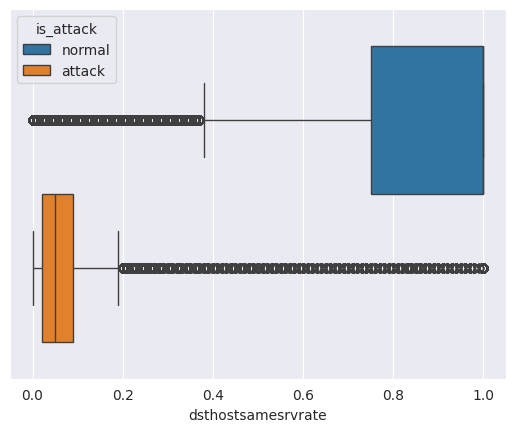

In [51]:
sns.boxplot(data=dhssdf,x='dsthostsamesrvrate',hue='is_attack')

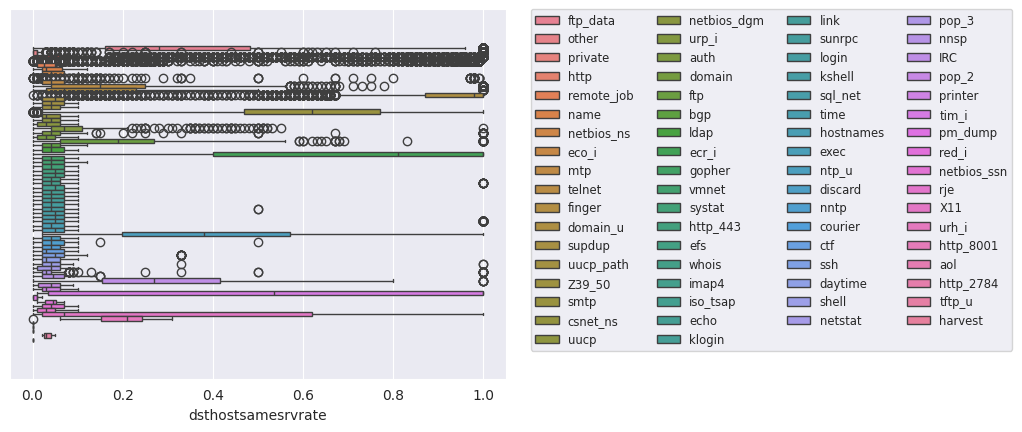

In [52]:
sns.boxplot(data=dhssdf,x='dsthostsamesrvrate',hue='service')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

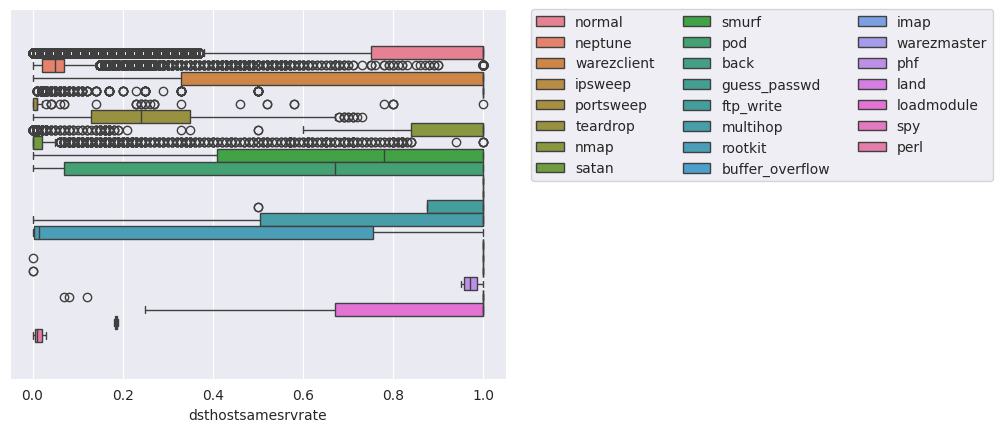

In [53]:
sns.boxplot(data=dhssdf,x='dsthostsamesrvrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=3)

In [54]:
df['dsthostdiffsrvrate'].value_counts()

,count
dsthostdiffsrvrate,
0.00,46989
0.07,16570
0.06,9787
0.01,9295
0.05,7321
...,...
0.34,42
0.92,40
0.88,39


<Axes: xlabel='dsthostdiffsrvrate', ylabel='Density'>

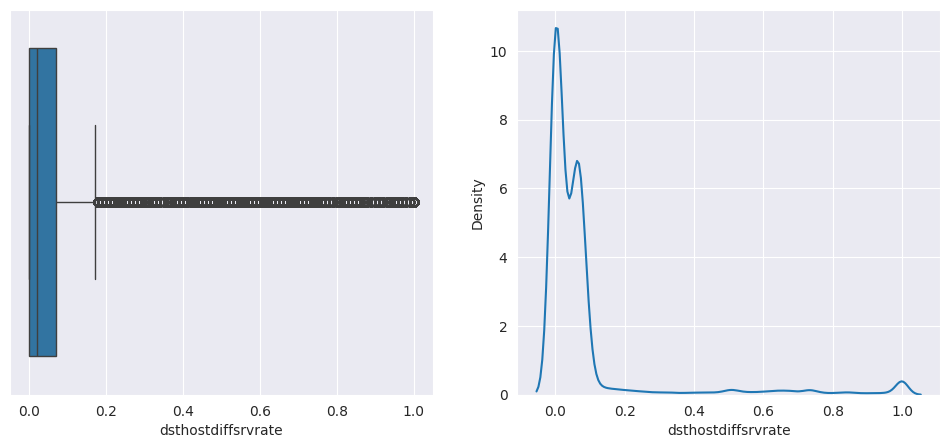

In [55]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostdiffsrvrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostdiffsrvrate')

In [56]:
pd.DataFrame(df['dsthostdiffsrvrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostdiffsrvrate,125973.0,0.082951,0.188922,0.0,0.0,0.02,0.07,1.0


In [57]:
IQR = np.percentile(df['dsthostdiffsrvrate'],75)-np.percentile(df['dsthostdiffsrvrate'],25)
ulimit = np.percentile(df['dsthostdiffsrvrate'],75) + 1.5*IQR
ulimit

0.17500000000000002

In [58]:
not_outlier = df[df['dsthostdiffsrvrate'] <= ulimit]
is_outlier = df[df['dsthostdiffsrvrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(91.62518952473943, 8.374810475260572)

In [59]:
not_outlier['is_attack'].value_counts()

,count
is_attack,
normal,63841
attack,51582


In [60]:
is_outlier['is_attack'].value_counts()

,count
is_attack,
attack,7048
normal,3502


In [61]:
# attacks when greater than 50%
df[df['dsthostdiffsrvrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
attack,5202
normal,2161


In [62]:
# attacks when less than 50%
df[df['dsthostdiffsrvrate']<0.5]['is_attack'].value_counts()

,count
is_attack,
normal,65182
attack,53428


In [63]:
dhddf = df.copy()
# bin the data into 4 groups
dhddf['bins'] = None
for i in range(len(dhddf)):
  ser = dhddf.loc[i,'dsthostdiffsrvrate']
  if ser < 0.25:
    dhddf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhddf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhddf.loc[i,'bins'] = 3
  else:
    dhddf.loc[i,'bins'] = 4

In [64]:
dhddf['bins'].value_counts()

,count
bins,
1,116522
4,3777
3,3586
2,2088


In [65]:
# number of attacks across each bin
pd.pivot_table(data=dhddf,index='bins',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
bins,,
1,52253,64269
2,1175,913
3,2034,1552
4,3168,609


In [66]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhddf[dhddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,41159.0,35.0,14.0,6.0
ipsweep,3126.0,NaN,2.0,471.0
smurf,2622.0,24.0,NaN,NaN
nmap,1218.0,2.0,30.0,243.0
back,956.0,NaN,NaN,NaN
warezclient,874.0,14.0,2.0,NaN
satan,850.0,503.0,366.0,1914.0
teardrop,617.0,55.0,152.0,68.0
portsweep,495.0,538.0,1445.0,453.0


In [67]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhddf[dhddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
portsweep,495.0,538.0,1445.0,453.0
satan,850.0,503.0,366.0,1914.0
teardrop,617.0,55.0,152.0,68.0
neptune,41159.0,35.0,14.0,6.0
smurf,2622.0,24.0,NaN,NaN
warezclient,874.0,14.0,2.0,NaN
pod,166.0,4.0,21.0,10.0
nmap,1218.0,2.0,30.0,243.0
back,956.0,NaN,NaN,NaN


In [68]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhddf[dhddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
portsweep,495.0,538.0,1445.0,453.0
satan,850.0,503.0,366.0,1914.0
teardrop,617.0,55.0,152.0,68.0
nmap,1218.0,2.0,30.0,243.0
pod,166.0,4.0,21.0,10.0
neptune,41159.0,35.0,14.0,6.0
ipsweep,3126.0,NaN,2.0,471.0
loadmodule,6.0,NaN,2.0,1.0
warezclient,874.0,14.0,2.0,NaN


In [69]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhddf[dhddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
satan,850.0,503.0,366.0,1914.0
ipsweep,3126.0,NaN,2.0,471.0
portsweep,495.0,538.0,1445.0,453.0
nmap,1218.0,2.0,30.0,243.0
teardrop,617.0,55.0,152.0,68.0
pod,166.0,4.0,21.0,10.0
neptune,41159.0,35.0,14.0,6.0
ftp_write,6.0,NaN,NaN,2.0
loadmodule,6.0,NaN,2.0,1.0


In [70]:
# type of service in each bin : bin 1
pd.pivot_table(data=dhddf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
service,,,,
http,40291.0,29.0,5.0,13.0
private,17774.0,916.0,1421.0,1742.0
domain_u,8980.0,28.0,20.0,15.0
smtp,6848.0,202.0,199.0,64.0
ftp_data,6425.0,248.0,118.0,69.0
eco_i,4564.0,6.0,8.0,8.0
ecr_i,3013.0,29.0,22.0,13.0
telnet,2209.0,64.0,49.0,31.0
finger,1698.0,34.0,11.0,24.0


In [71]:
# type of service in each bin : bin 2
pd.pivot_table(data=dhddf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
service,,,,
private,17774.0,916.0,1421.0,1742.0
other,1022.0,310.0,1585.0,1442.0
ftp_data,6425.0,248.0,118.0,69.0
smtp,6848.0,202.0,199.0,64.0
telnet,2209.0,64.0,49.0,31.0
ftp,1656.0,54.0,16.0,28.0
finger,1698.0,34.0,11.0,24.0
ecr_i,3013.0,29.0,22.0,13.0
http,40291.0,29.0,5.0,13.0


In [72]:
# type of service in each bin : bin 3
pd.pivot_table(data=dhddf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
service,,,,
other,1022.0,310.0,1585.0,1442.0
private,17774.0,916.0,1421.0,1742.0
smtp,6848.0,202.0,199.0,64.0
ftp_data,6425.0,248.0,118.0,69.0
telnet,2209.0,64.0,49.0,31.0
ecr_i,3013.0,29.0,22.0,13.0
domain_u,8980.0,28.0,20.0,15.0
ftp,1656.0,54.0,16.0,28.0
auth,920.0,10.0,12.0,13.0


In [73]:
# type of service in each bin : bin 4
pd.pivot_table(data=dhddf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
service,,,,
private,17774.0,916.0,1421.0,1742.0
other,1022.0,310.0,1585.0,1442.0
ftp_data,6425.0,248.0,118.0,69.0
smtp,6848.0,202.0,199.0,64.0
telnet,2209.0,64.0,49.0,31.0
ftp,1656.0,54.0,16.0,28.0
finger,1698.0,34.0,11.0,24.0
gopher,493.0,8.0,1.0,16.0
time,634.0,5.0,NaN,15.0


<Axes: xlabel='dsthostdiffsrvrate'>

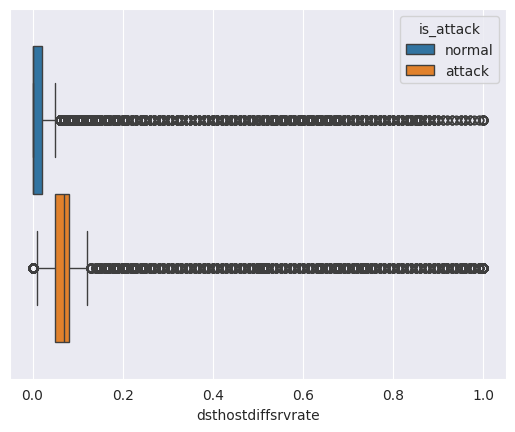

In [74]:
sns.boxplot(data=dhddf,x='dsthostdiffsrvrate',hue='is_attack')

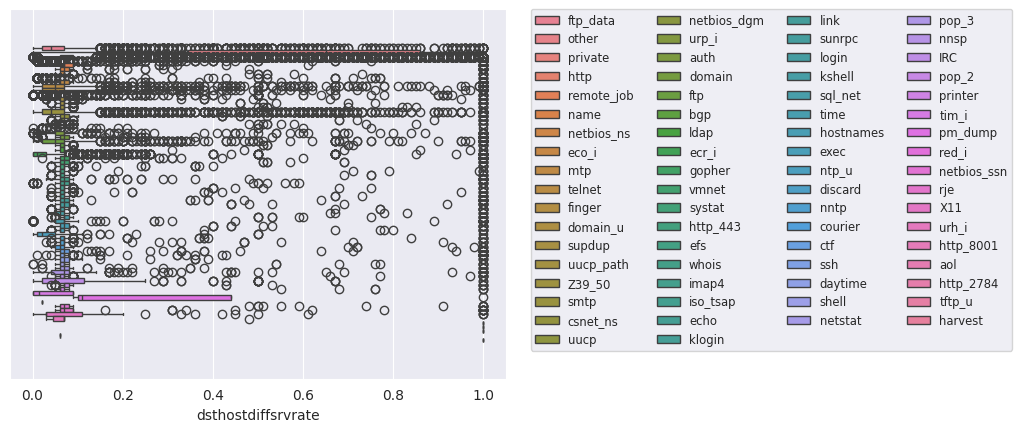

In [75]:
sns.boxplot(data=dhddf,x='dsthostdiffsrvrate',hue='service')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

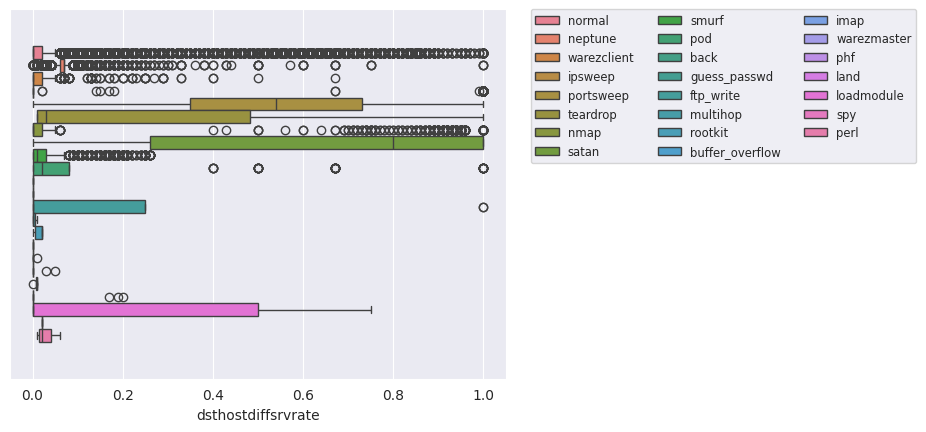

In [76]:
sns.boxplot(data=dhddf,x='dsthostdiffsrvrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=3,fontsize='small')

In [77]:
shdf = df[['duration','service','attack','dsthostcount','dsthostsamesrvrate','dsthostdiffsrvrate']].copy()

shdf['sbins'] = None
shdf['dbins'] = None
for i in range(len(shdf)):
  ser = shdf.loc[i,'dsthostsamesrvrate']
  if ser < 0.25:
    shdf.loc[i,'sbins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    shdf.loc[i,'sbins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    shdf.loc[i,'sbins'] = 3
  else:
    shdf.loc[i,'sbins'] = 4

  ser2 = shdf.loc[i,'dsthostdiffsrvrate']
  if ser2 < 0.25:
    shdf.loc[i,'dbins'] = 1
  elif ser2 >= 0.25 and ser2 < 0.5:
    shdf.loc[i,'dbins'] = 2
  elif ser2 >= 0.5 and ser2 < 0.75:
    shdf.loc[i,'dbins'] = 3
  else:
    shdf.loc[i,'dbins'] = 4

In [78]:
l1 = pd.pivot_table(data=shdf,index='service',columns='sbins',values='duration',aggfunc='count')
l2 = pd.pivot_table(data=shdf,index='service',columns='dbins',values='duration',aggfunc='count')
merged = pd.merge(l1,l2,left_index=True,right_index=True)
merged.columns = ['s1','s2','s3','s4','d1','d2','d3','d4']
merged
merged['All'] = merged.loc[:,'s1':'s4'].sum(axis=1)
merged.sort_values('All',ascending=False)

,s1,s2,s3,s4,d1,d2,d3,d4,All
service,,,,,,,,,
http,1026.0,304.0,49.0,38959.0,40291.0,29.0,5.0,13.0,40338.0
private,19803.0,594.0,307.0,1149.0,17774.0,916.0,1421.0,1742.0,21853.0
domain_u,307.0,93.0,701.0,7942.0,8980.0,28.0,20.0,15.0,9043.0
smtp,846.0,1297.0,3006.0,2164.0,6848.0,202.0,199.0,64.0,7313.0
ftp_data,2844.0,2365.0,510.0,1141.0,6425.0,248.0,118.0,69.0,6860.0
...,...,...,...,...,...,...,...,...,...
tftp_u,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0
http_8001,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
harvest,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0


In [79]:
df['dsthostsamesrcportrate'].value_counts()

,count
dsthostsamesrcportrate,
0.00,63023
0.01,17657
1.00,10307
0.02,5743
0.03,3278
...,...
0.74,69
0.63,65
0.77,63


<Axes: xlabel='dsthostsamesrcportrate', ylabel='Density'>

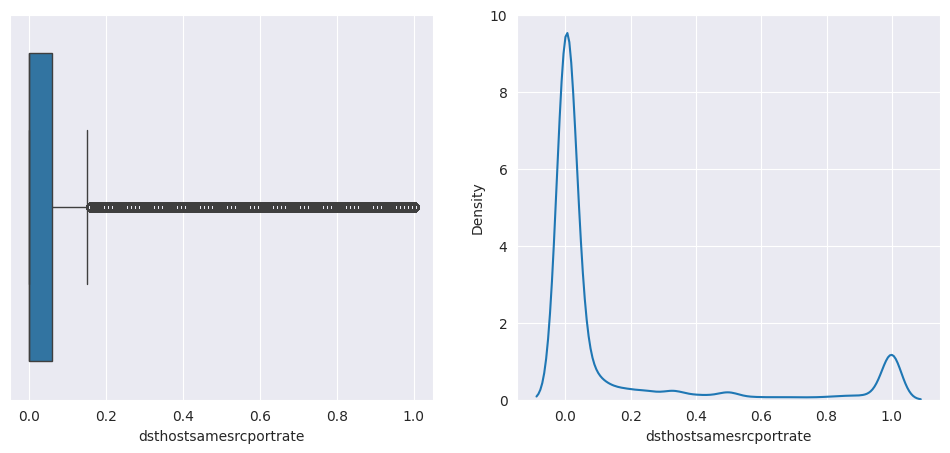

In [80]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsamesrcportrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostsamesrcportrate')

In [81]:
pd.DataFrame(df['dsthostsamesrcportrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsamesrcportrate,125973.0,0.148379,0.308997,0.0,0.0,0.0,0.06,1.0


In [82]:
IQR = np.percentile(df['dsthostsamesrcportrate'],75)-np.percentile(df['dsthostsamesrcportrate'],25)
ulimit = np.percentile(df['dsthostsamesrcportrate'],75) + 1.5*IQR
ulimit

0.15

In [83]:
not_outlier = df[df['dsthostsamesrcportrate'] <= ulimit]
is_outlier = df[df['dsthostsamesrcportrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(80.11319886007318, 19.88680113992681)

In [84]:
not_outlier['is_attack'].value_counts()

,count
is_attack,
normal,54814
attack,46107


In [85]:
is_outlier['is_attack'].value_counts()

,count
is_attack,
normal,12529
attack,12523


In [86]:
# attacks when greater than 50%
df[df['dsthostsamesrcportrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
attack,10295
normal,6371


In [87]:
# attacks when greater than 50%
df[df['dsthostsamesrcportrate']<0.5]['is_attack'].value_counts()

,count
is_attack,
normal,60972
attack,48335


In [88]:
dhspdf = df.copy()
# bin the data into 4 groups
dhspdf['bins'] = None
for i in range(len(dhspdf)):
  ser = dhspdf.loc[i,'dsthostsamesrcportrate']
  if ser < 0.25:
    dhspdf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhspdf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhspdf.loc[i,'bins'] = 3
  else:
    dhspdf.loc[i,'bins'] = 4

In [89]:
dhspdf['bins'].value_counts()

,count
bins,
1,103746
4,13529
2,5561
3,3137


In [90]:
# number of attacks across each bin
pd.pivot_table(data=dhspdf,index='bins',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
bins,,
1,46733,57013
2,1602,3959
3,1292,1845
4,9003,4526


In [91]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhspdf[dhspdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,41186.0,18.0,5.0,5.0
satan,2469.0,242.0,205.0,717.0
back,940.0,8.0,4.0,4.0
teardrop,449.0,356.0,87.0,NaN
ipsweep,442.0,25.0,12.0,3120.0
smurf,369.0,437.0,457.0,1383.0
portsweep,362.0,465.0,461.0,1643.0
warezclient,314.0,37.0,4.0,535.0
pod,78.0,3.0,23.0,97.0


In [92]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhspdf[dhspdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
portsweep,362.0,465.0,461.0,1643.0
smurf,369.0,437.0,457.0,1383.0
teardrop,449.0,356.0,87.0,NaN
satan,2469.0,242.0,205.0,717.0
warezclient,314.0,37.0,4.0,535.0
ipsweep,442.0,25.0,12.0,3120.0
neptune,41186.0,18.0,5.0,5.0
back,940.0,8.0,4.0,4.0
nmap,42.0,6.0,23.0,1422.0


In [93]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhspdf[dhspdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
portsweep,362.0,465.0,461.0,1643.0
smurf,369.0,437.0,457.0,1383.0
satan,2469.0,242.0,205.0,717.0
teardrop,449.0,356.0,87.0,NaN
nmap,42.0,6.0,23.0,1422.0
pod,78.0,3.0,23.0,97.0
ipsweep,442.0,25.0,12.0,3120.0
buffer_overflow,6.0,2.0,6.0,16.0
neptune,41186.0,18.0,5.0,5.0


In [94]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhspdf[dhspdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
ipsweep,442.0,25.0,12.0,3120.0
portsweep,362.0,465.0,461.0,1643.0
nmap,42.0,6.0,23.0,1422.0
smurf,369.0,437.0,457.0,1383.0
satan,2469.0,242.0,205.0,717.0
warezclient,314.0,37.0,4.0,535.0
pod,78.0,3.0,23.0,97.0
warezmaster,2.0,NaN,NaN,18.0
buffer_overflow,6.0,2.0,6.0,16.0


<Axes: xlabel='dsthostsamesrcportrate'>

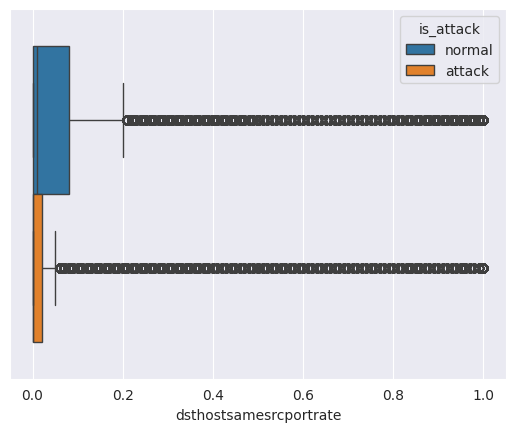

In [95]:
sns.boxplot(data=dhspdf,x='dsthostsamesrcportrate',hue='is_attack')

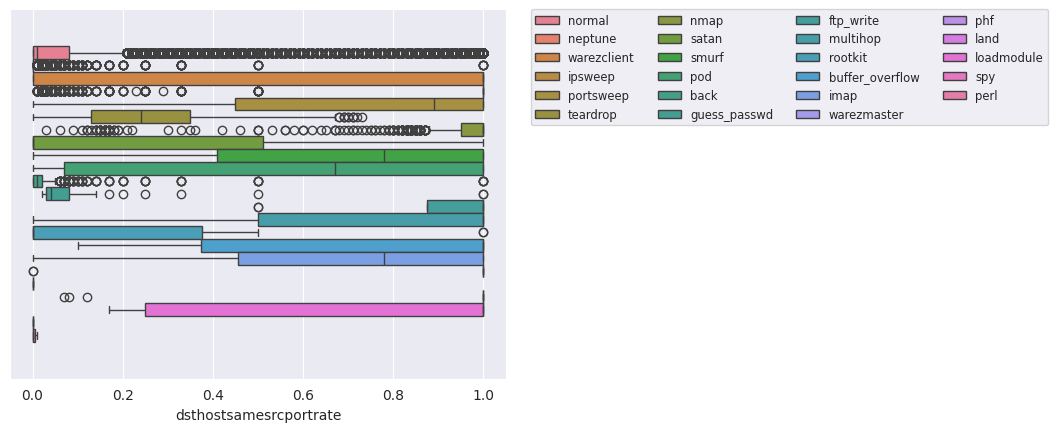

In [96]:
sns.boxplot(data=dhspdf,x='dsthostsamesrcportrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

In [97]:
df['dsthostsrvdiffhostrate'].value_counts()

,count
dsthostsrvdiffhostrate,
0.00,86904
0.02,7952
0.01,7146
0.03,4723
0.04,4518
...,...
0.93,1
0.71,1
0.88,1


<Axes: xlabel='dsthostsrvdiffhostrate', ylabel='Density'>

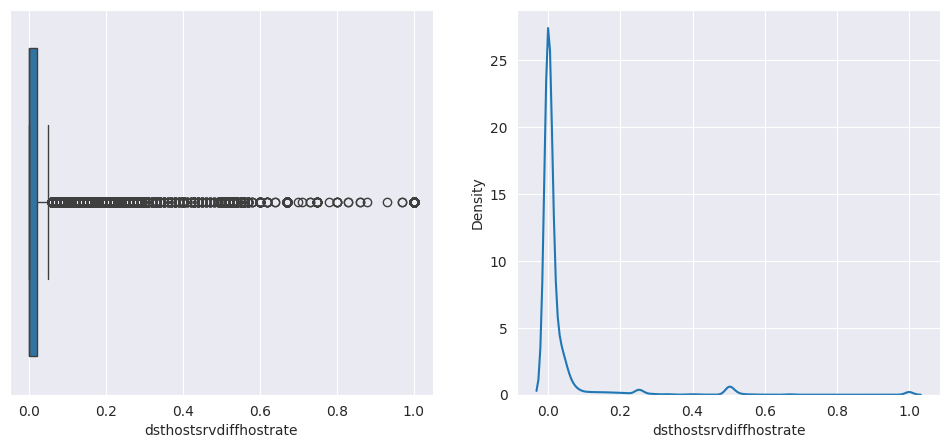

In [98]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsrvdiffhostrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostsrvdiffhostrate')

In [99]:
pd.DataFrame(df['dsthostsrvdiffhostrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvdiffhostrate,125973.0,0.032542,0.112564,0.0,0.0,0.0,0.02,1.0


In [100]:
IQR = np.percentile(df['dsthostsrvdiffhostrate'],75)-np.percentile(df['dsthostsrvdiffhostrate'],25)
ulimit = np.percentile(df['dsthostsrvdiffhostrate'],75) + 1.5*IQR
ulimit

0.05

In [101]:
not_outlier = df[df['dsthostsrvdiffhostrate'] <= ulimit]
is_outlier = df[df['dsthostsrvdiffhostrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(90.72658426805744, 9.27341573194256)

In [102]:
not_outlier['is_attack'].value_counts()

,count
is_attack,
normal,60784
attack,53507


In [103]:
is_outlier['is_attack'].value_counts()

,count
is_attack,
normal,6559
attack,5123


In [104]:
# attacks when greater than 50%
df[df['dsthostsrvdiffhostrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
attack,3189
normal,313


In [105]:
# attacks when greater than 50%
df[df['dsthostsrvdiffhostrate']<0.75]['is_attack'].value_counts()

,count
is_attack,
normal,67204
attack,58048


In [106]:
dhsddf = df.copy()
# bin the data into 4 groups
dhsddf['bins'] = None
for i in range(len(dhsddf)):
  ser = dhsddf.loc[i,'dsthostsrvdiffhostrate']
  if ser < 0.25:
    dhsddf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhsddf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhsddf.loc[i,'bins'] = 3
  else:
    dhsddf.loc[i,'bins'] = 4

In [107]:
dhsddf['bins'].value_counts()

,count
bins,
1,120501
3,2781
2,1970
4,721


In [108]:
# number of attacks across each bin
pd.pivot_table(data=dhsddf,index='bins',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
bins,,
1,54124,66377
2,1317,653
3,2607,174
4,582,139


In [109]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhsddf[dhsddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,41190.0,18.0,4.0,2.0
satan,3628.0,4.0,1.0,NaN
portsweep,2925.0,2.0,2.0,2.0
smurf,2646.0,NaN,NaN,NaN
back,956.0,NaN,NaN,NaN
teardrop,892.0,NaN,NaN,NaN
warezclient,837.0,46.0,7.0,NaN
nmap,536.0,957.0,NaN,NaN
ipsweep,220.0,282.0,2529.0,568.0


In [110]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhsddf[dhsddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
nmap,536.0,957.0,NaN,NaN
ipsweep,220.0,282.0,2529.0,568.0
warezclient,837.0,46.0,7.0,NaN
neptune,41190.0,18.0,4.0,2.0
land,4.0,5.0,1.0,8.0
satan,3628.0,4.0,1.0,NaN
loadmodule,5.0,2.0,2.0,NaN
portsweep,2925.0,2.0,2.0,2.0
ftp_write,6.0,1.0,1.0,NaN


In [111]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhsddf[dhsddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
ipsweep,220.0,282.0,2529.0,568.0
pod,143.0,NaN,58.0,NaN
warezclient,837.0,46.0,7.0,NaN
neptune,41190.0,18.0,4.0,2.0
buffer_overflow,27.0,NaN,2.0,1.0
loadmodule,5.0,2.0,2.0,NaN
portsweep,2925.0,2.0,2.0,2.0
ftp_write,6.0,1.0,1.0,NaN
land,4.0,5.0,1.0,8.0


In [112]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhsddf[dhsddf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
ipsweep,220.0,282.0,2529.0,568.0
land,4.0,5.0,1.0,8.0
neptune,41190.0,18.0,4.0,2.0
portsweep,2925.0,2.0,2.0,2.0
buffer_overflow,27.0,NaN,2.0,1.0
guess_passwd,52.0,NaN,NaN,1.0
back,956.0,NaN,NaN,NaN
ftp_write,6.0,1.0,1.0,NaN
imap,11.0,NaN,NaN,NaN


In [113]:
# detailed sub binning under bin 1, find the value after which attacks rise
dhsddf['cbin2'] = None
for i in range(len(dhsddf)):
  ser = dhsddf.loc[i,'dsthostsrvdiffhostrate']
  if ser < 0.05:
    dhsddf.loc[i,'cbin2'] = 1
  elif ser >= 0.05 and ser < 0.1:
    dhsddf.loc[i,'cbin2'] = 2
  elif ser >= 0.1 and ser < 0.15:
    dhsddf.loc[i,'cbin2'] = 3
  elif ser >= 0.15 and ser < 0.20:
    dhsddf.loc[i,'cbin2'] = 4
  elif ser >= 0.20 and ser < 0.25:
    dhsddf.loc[i,'cbin2'] = 5
  else:
    dhsddf.loc[i,'cbin2'] = 6

In [114]:
dhsddf['cbin2'].value_counts()

,count
cbin2,
1,111243
2,6316
6,5472
3,1238
4,1031
5,673


In [115]:
# number of attacks across each bin
pd.pivot_table(data=dhsddf,index='cbin2',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
cbin2,,
1,53452,57791
2,189,6127
3,260,978
4,161,870
5,62,611
6,4506,966


<Axes: xlabel='dsthostsamesrcportrate'>

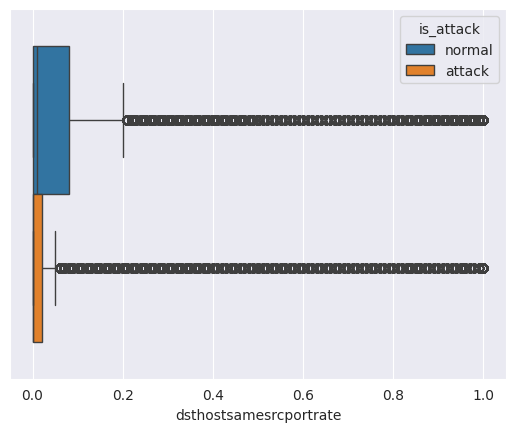

In [116]:
sns.boxplot(data=dhspdf,x='dsthostsamesrcportrate',hue='is_attack')

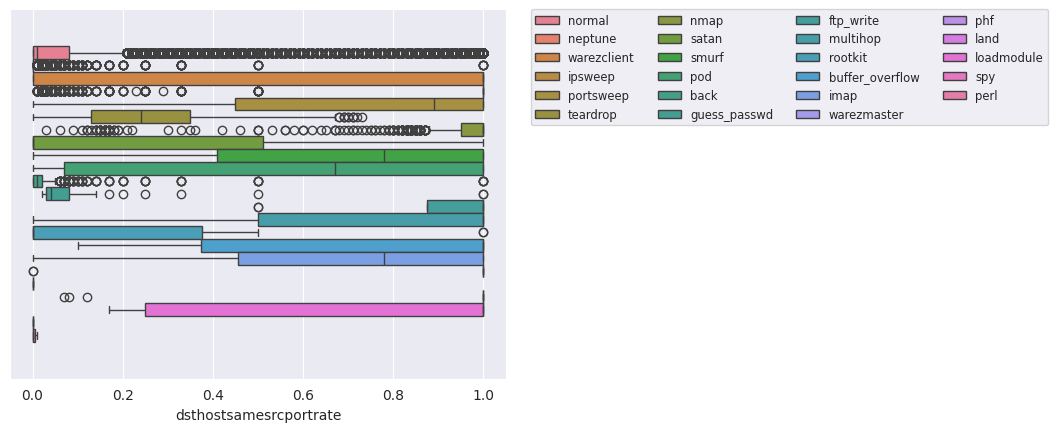

In [117]:
sns.boxplot(data=dhspdf,x='dsthostsamesrcportrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

In [118]:
df['dsthostserrorrate'].value_counts()

,count
dsthostserrorrate,
0.00,81386
1.00,33562
0.01,3345
0.02,1158
0.03,711
...,...
0.28,11
0.34,11
0.30,11


<Axes: xlabel='dsthostserrorrate', ylabel='Density'>

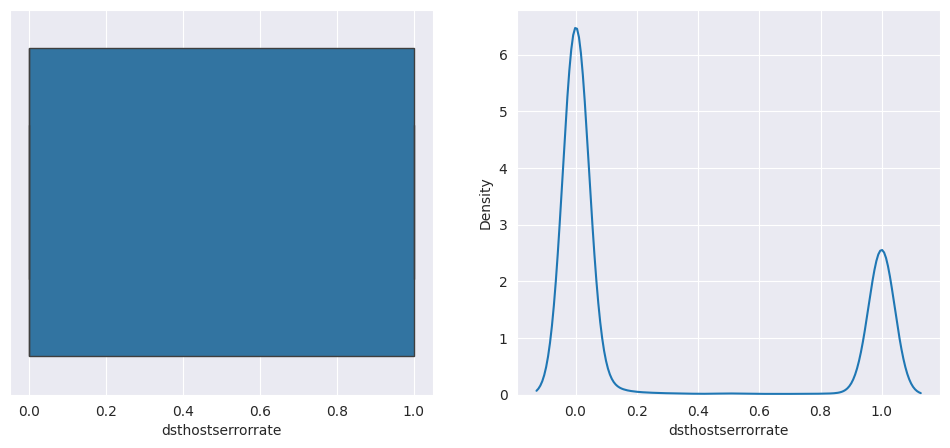

In [119]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostserrorrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostserrorrate')

In [120]:
pd.DataFrame(df['dsthostserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostserrorrate,125973.0,0.284452,0.444784,0.0,0.0,0.0,1.0,1.0


In [121]:
IQR = np.percentile(df['dsthostserrorrate'],75)-np.percentile(df['dsthostserrorrate'],25)
ulimit = np.percentile(df['dsthostserrorrate'],75) + 1.5*IQR
ulimit

2.5

In [122]:
not_outlier = df[df['dsthostserrorrate'] <= ulimit]
is_outlier = df[df['dsthostserrorrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(100.0, 0.0)

In [123]:
# checking attacks above 50% error
df[df['dsthostserrorrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
attack,34664
normal,868


In [124]:
# checking attacks above 50% error
df[df['dsthostserrorrate']<0.5]['is_attack'].value_counts()

,count
is_attack,
normal,66475
attack,23966


In [125]:
dhsedf = df.copy()
# divide data into 4 bins each bin having 0.25%
dhsedf['bins'] = None
for i in range(len(dhsedf)):
  ser = dhsedf.loc[i,'dsthostserrorrate']
  if ser < 0.25:
    dhsedf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhsedf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhsedf.loc[i,'bins'] = 3
  else:
    dhsedf.loc[i,'bins'] = 4

In [126]:
dhsedf['bins'].value_counts()

,count
bins,
1,89765
4,34985
2,676
3,547


In [127]:
# number of attacks in each bin
pd.pivot_table(data=dhsedf,index='bins',columns='is_attack',values='duration',aggfunc='count',margins=True)

is_attack,attack,normal,All
bins,,,
1,23758,66007,89765
2,208,468,676
3,128,419,547
4,34536,449,34985
All,58630,67343,125973


In [128]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhsedf[dhsedf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False)

bins,1,2,3,4
attack,,,,
neptune,6890.0,11.0,38.0,34275.0
ipsweep,3599.0,NaN,NaN,NaN
satan,3567.0,63.0,3.0,NaN
portsweep,2829.0,69.0,33.0,NaN
smurf,2605.0,41.0,NaN,NaN
nmap,1226.0,6.0,19.0,242.0
back,956.0,NaN,NaN,NaN
teardrop,892.0,NaN,NaN,NaN
warezclient,884.0,4.0,1.0,1.0


In [129]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhsedf[dhsedf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
portsweep,2829.0,69.0,33.0,NaN
satan,3567.0,63.0,3.0,NaN
smurf,2605.0,41.0,NaN,NaN
neptune,6890.0,11.0,38.0,34275.0
pod,166.0,10.0,25.0,NaN
nmap,1226.0,6.0,19.0,242.0
warezclient,884.0,4.0,1.0,1.0
guess_passwd,49.0,2.0,1.0,1.0
imap,1.0,1.0,7.0,2.0


In [130]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhsedf[dhsedf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,6890.0,11.0,38.0,34275.0
portsweep,2829.0,69.0,33.0,NaN
pod,166.0,10.0,25.0,NaN
nmap,1226.0,6.0,19.0,242.0
imap,1.0,1.0,7.0,2.0
satan,3567.0,63.0,3.0,NaN
guess_passwd,49.0,2.0,1.0,1.0
land,2.0,NaN,1.0,15.0
warezclient,884.0,4.0,1.0,1.0


In [131]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhsedf[dhsedf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,6890.0,11.0,38.0,34275.0
nmap,1226.0,6.0,19.0,242.0
land,2.0,NaN,1.0,15.0
imap,1.0,1.0,7.0,2.0
guess_passwd,49.0,2.0,1.0,1.0
warezclient,884.0,4.0,1.0,1.0
back,956.0,NaN,NaN,NaN
buffer_overflow,30.0,NaN,NaN,NaN
ftp_write,8.0,NaN,NaN,NaN


In [132]:
# detailed sub binning under bin 1, find the value after which attacks rise
dhsedf['cbin2'] = None
for i in range(len(dhsedf)):
  ser = dhsedf.loc[i,'dsthostserrorrate']
  if ser < 0.05:
    dhsedf.loc[i,'cbin2'] = 1
  elif ser >= 0.05 and ser < 0.1:
    dhsedf.loc[i,'cbin2'] = 2
  elif ser >= 0.1 and ser < 0.15:
    dhsedf.loc[i,'cbin2'] = 3
  elif ser >= 0.15 and ser < 0.20:
    dhsedf.loc[i,'cbin2'] = 4
  elif ser >= 0.20 and ser < 0.25:
    dhsedf.loc[i,'cbin2'] = 5
  else:
    dhsedf.loc[i,'cbin2'] = 6

In [133]:
dhsedf['cbin2'].value_counts()

,count
cbin2,
1,86972
6,36208
2,1501
3,670
4,424
5,198


In [134]:
# number of attacks in each bin
pd.pivot_table(data=dhsedf,index='cbin2',columns='is_attack',values='duration',aggfunc='count',margins=True)

is_attack,attack,normal,All
cbin2,,,
1,21606,65366,86972
2,1129,372,1501
3,502,168,670
4,372,52,424
5,149,49,198
6,34872,1336,36208
All,58630,67343,125973


<Axes: xlabel='dsthostserrorrate'>

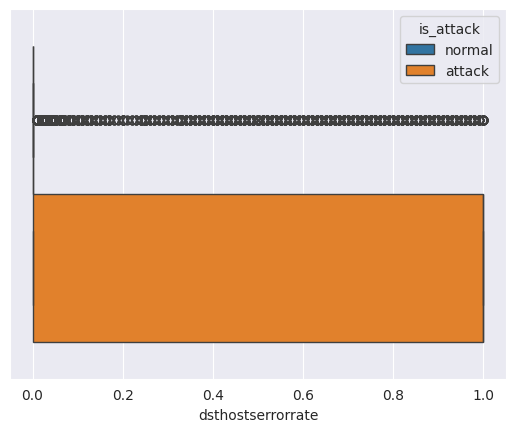

In [135]:
sns.boxplot(data=dhspdf,x='dsthostserrorrate',hue='is_attack')

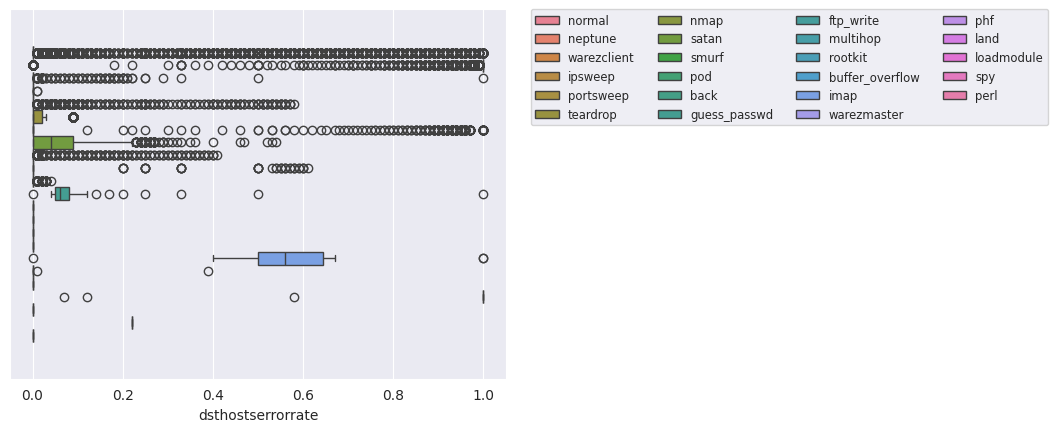

In [136]:
sns.boxplot(data=dhspdf,x='dsthostserrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

In [137]:
df['dsthostrerrorrate'].value_counts()

,count
dsthostrerrorrate,
0.00,103178
1.00,10298
0.01,1800
0.02,1222
0.03,497
...,...
0.54,51
0.70,48
0.66,44


<Axes: xlabel='dsthostrerrorrate', ylabel='Density'>

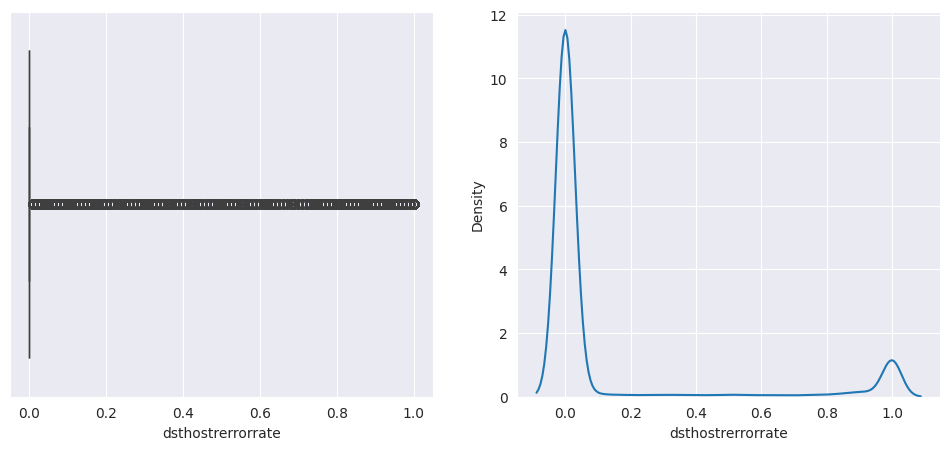

In [138]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostrerrorrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostrerrorrate')

In [139]:
pd.DataFrame(df['dsthostrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostrerrorrate,125973.0,0.118832,0.306557,0.0,0.0,0.0,0.0,1.0


In [140]:
IQR = np.percentile(df['dsthostrerrorrate'],75)-np.percentile(df['dsthostrerrorrate'],25)
ulimit = np.percentile(df['dsthostrerrorrate'],75) + 1.5*IQR
ulimit

0.0

In [141]:
not_outlier = df[df['dsthostrerrorrate'] <= ulimit]
is_outlier = df[df['dsthostrerrorrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(81.90485262715026, 18.095147372849738)

In [142]:
not_outlier['is_attack'].value_counts()

,count
is_attack,
normal,60001
attack,43177


In [143]:
is_outlier['is_attack'].value_counts()

,count
is_attack,
attack,15453
normal,7342


In [144]:
# checking attacks above 50% error
df[df['dsthostrerrorrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
attack,11990
normal,3042


In [145]:
# checking attacks less than 50% error
df[df['dsthostrerrorrate']<0.5]['is_attack'].value_counts()

,count
is_attack,
normal,64301
attack,46640


In [146]:
dhrdf = df.copy()
# divide data into 4 bins each bin having 0.25%
dhrdf['bins'] = None
for i in range(len(dhrdf)):
  ser = dhrdf.loc[i,'dsthostrerrorrate']
  if ser < 0.25:
    dhrdf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhrdf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhrdf.loc[i,'bins'] = 3
  else:
    dhrdf.loc[i,'bins'] = 4

In [147]:
dhrdf['bins'].value_counts()

,count
bins,
1,109261
4,13423
2,1680
3,1609


In [148]:
# number of attacks in each bin
pd.pivot_table(data=dhrdf,index='bins',columns='is_attack',values='duration',aggfunc='count',margins=True)

is_attack,attack,normal,All
bins,,,
1,45441,63820,109261
2,1199,481,1680
3,1199,410,1609
4,10791,2632,13423
All,58630,67343,125973


In [149]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhrdf[dhrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,34326.0,NaN,NaN,6888.0
ipsweep,3117.0,NaN,15.0,467.0
smurf,2480.0,136.0,30.0,NaN
nmap,1493.0,NaN,NaN,NaN
satan,1034.0,448.0,458.0,1693.0
back,905.0,39.0,6.0,6.0
warezclient,888.0,2.0,NaN,NaN
teardrop,534.0,80.0,228.0,50.0
portsweep,341.0,494.0,458.0,1638.0


In [150]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhrdf[dhrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
portsweep,341.0,494.0,458.0,1638.0
satan,1034.0,448.0,458.0,1693.0
smurf,2480.0,136.0,30.0,NaN
teardrop,534.0,80.0,228.0,50.0
back,905.0,39.0,6.0,6.0
warezclient,888.0,2.0,NaN,NaN
buffer_overflow,30.0,NaN,NaN,NaN
ftp_write,8.0,NaN,NaN,NaN
guess_passwd,2.0,NaN,2.0,49.0


In [151]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhrdf[dhrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
portsweep,341.0,494.0,458.0,1638.0
satan,1034.0,448.0,458.0,1693.0
teardrop,534.0,80.0,228.0,50.0
smurf,2480.0,136.0,30.0,NaN
ipsweep,3117.0,NaN,15.0,467.0
back,905.0,39.0,6.0,6.0
guess_passwd,2.0,NaN,2.0,49.0
perl,2.0,NaN,1.0,NaN
rootkit,9.0,NaN,1.0,NaN


In [152]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhrdf[dhrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,34326.0,NaN,NaN,6888.0
satan,1034.0,448.0,458.0,1693.0
portsweep,341.0,494.0,458.0,1638.0
ipsweep,3117.0,NaN,15.0,467.0
teardrop,534.0,80.0,228.0,50.0
guess_passwd,2.0,NaN,2.0,49.0
back,905.0,39.0,6.0,6.0
buffer_overflow,30.0,NaN,NaN,NaN
ftp_write,8.0,NaN,NaN,NaN


In [153]:
# detailed sub binning under bin 1, find the value after which attacks rise
dhrdf['cbin2'] = None
for i in range(len(dhrdf)):
  ser = dhrdf.loc[i,'dsthostrerrorrate']
  if ser < 0.05:
    dhrdf.loc[i,'cbin2'] = 1
  elif ser >= 0.05 and ser < 0.1:
    dhrdf.loc[i,'cbin2'] = 2
  elif ser >= 0.1 and ser < 0.15:
    dhrdf.loc[i,'cbin2'] = 3
  elif ser >= 0.15 and ser < 0.20:
    dhrdf.loc[i,'cbin2'] = 4
  elif ser >= 0.20 and ser < 0.25:
    dhrdf.loc[i,'cbin2'] = 5
  else:
    dhrdf.loc[i,'cbin2'] = 6

In [154]:
dhrdf['cbin2'].value_counts()

,count
cbin2,
1,107094
6,16712
2,1044
3,437
4,379
5,307


In [155]:
pd.pivot_table(data=dhrdf,index='cbin2',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
cbin2,,
1,44370,62724
2,471,573
3,182,255
4,225,154
5,193,114
6,13189,3523


<Axes: xlabel='dsthostrerrorrate'>

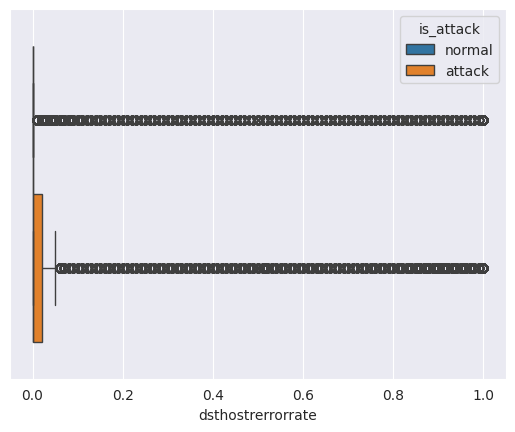

In [156]:
sns.boxplot(data=dhspdf,x='dsthostrerrorrate',hue='is_attack')

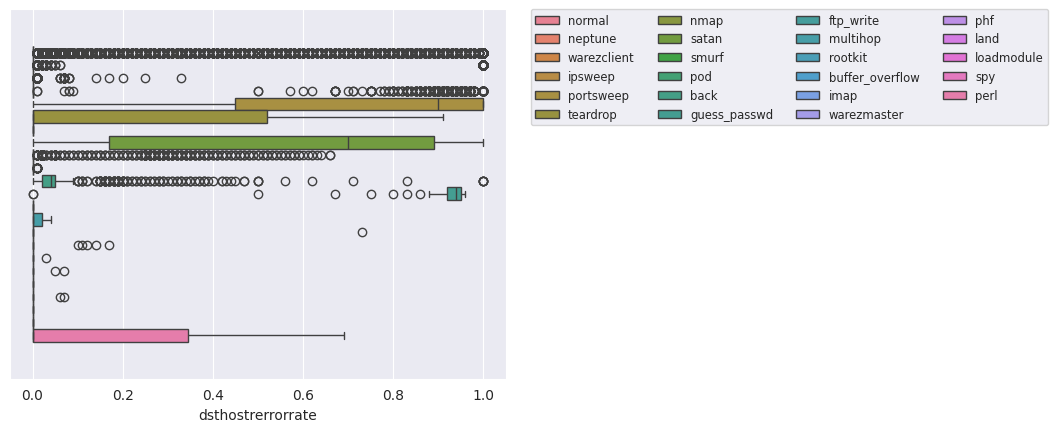

In [157]:
sns.boxplot(data=dhspdf,x='dsthostrerrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

In [158]:
df['dsthostsrvserrorrate'].value_counts()

,count
dsthostsrvserrorrate,
0.00,85360
1.00,34256
0.01,3762
0.02,640
0.03,160
...,...
0.35,4
0.44,4
0.53,4


<Axes: xlabel='dsthostsrvserrorrate', ylabel='Density'>

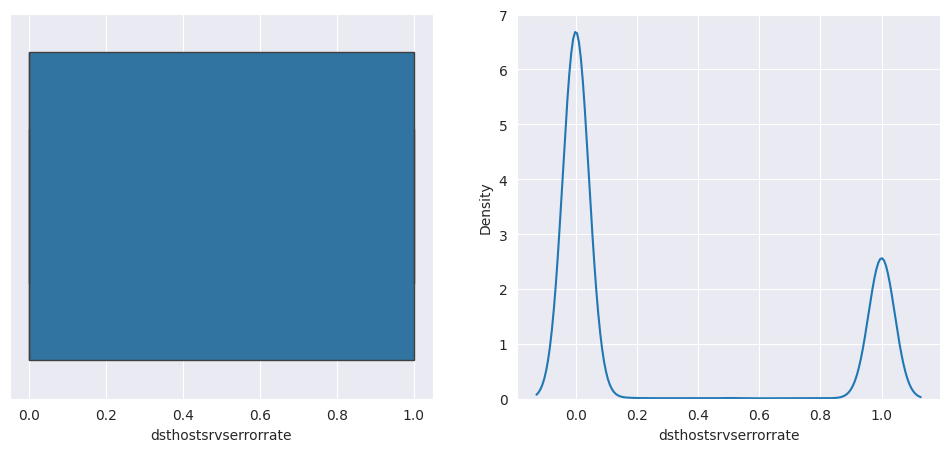

In [159]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsrvserrorrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostsrvserrorrate')

In [160]:
pd.DataFrame(df['dsthostsrvserrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvserrorrate,125973.0,0.278485,0.445669,0.0,0.0,0.0,1.0,1.0


In [161]:
IQR = np.percentile(df['dsthostsrvserrorrate'],75)-np.percentile(df['dsthostsrvserrorrate'],25)
ulimit = np.percentile(df['dsthostsrvserrorrate'],75) + 1.5*IQR
ulimit

2.5

In [162]:
not_outlier = df[df['dsthostsrvserrorrate'] <= ulimit]
is_outlier = df[df['dsthostsrvserrorrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(100.0, 0.0)

In [163]:
# checking attacks above 50% error
df[df['dsthostsrvserrorrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
attack,34731
normal,320


In [164]:
# checking attacks below 50% error
df[df['dsthostsrvserrorrate']<0.5]['is_attack'].value_counts()

,count
is_attack,
normal,67023
attack,23899


In [165]:
dhsrvdf = df.copy()
# divide data into 4 bins each bin having 0.25%
dhsrvdf['bins'] = None
for i in range(len(dhsrvdf)):
  ser = dhsrvdf.loc[i,'dsthostsrvserrorrate']
  if ser < 0.25:
    dhsrvdf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhsrvdf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhsrvdf.loc[i,'bins'] = 3
  else:
    dhsrvdf.loc[i,'bins'] = 4

In [166]:
dhsrvdf['bins'].value_counts()

,count
bins,
1,90678
4,34710
3,341
2,244


In [167]:
# number of attacks in each bin
pd.pivot_table(data=dhsrvdf,index='bins',columns='is_attack',values='duration',aggfunc='count',margins=True)

is_attack,attack,normal,All
bins,,,
1,23825,66853,90678
2,74,170,244
3,194,147,341
4,34537,173,34710
All,58630,67343,125973


In [168]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhsrvdf[dhsrvdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,6943.0,66.0,94.0,34111.0
ipsweep,3599.0,NaN,NaN,NaN
satan,3536.0,1.0,NaN,96.0
portsweep,2788.0,1.0,89.0,53.0
smurf,2646.0,NaN,NaN,NaN
nmap,1229.0,NaN,1.0,263.0
back,956.0,NaN,NaN,NaN
teardrop,892.0,NaN,NaN,NaN
warezclient,889.0,NaN,NaN,1.0


In [169]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhsrvdf[dhsrvdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,6943.0,66.0,94.0,34111.0
guess_passwd,49.0,2.0,1.0,1.0
spy,NaN,2.0,NaN,NaN
imap,1.0,1.0,7.0,2.0
portsweep,2788.0,1.0,89.0,53.0
rootkit,9.0,1.0,NaN,NaN
satan,3536.0,1.0,NaN,96.0
back,956.0,NaN,NaN,NaN
buffer_overflow,30.0,NaN,NaN,NaN


In [170]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhsrvdf[dhsrvdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,6943.0,66.0,94.0,34111.0
portsweep,2788.0,1.0,89.0,53.0
imap,1.0,1.0,7.0,2.0
land,6.0,NaN,2.0,10.0
guess_passwd,49.0,2.0,1.0,1.0
nmap,1229.0,NaN,1.0,263.0
back,956.0,NaN,NaN,NaN
buffer_overflow,30.0,NaN,NaN,NaN
ftp_write,8.0,NaN,NaN,NaN


In [171]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhsrvdf[dhsrvdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,6943.0,66.0,94.0,34111.0
nmap,1229.0,NaN,1.0,263.0
satan,3536.0,1.0,NaN,96.0
portsweep,2788.0,1.0,89.0,53.0
land,6.0,NaN,2.0,10.0
imap,1.0,1.0,7.0,2.0
guess_passwd,49.0,2.0,1.0,1.0
warezclient,889.0,NaN,NaN,1.0
back,956.0,NaN,NaN,NaN


In [172]:
# type of service in each bin : bin 1
pd.pivot_table(data=dhsrvdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
service,,,,
http,39212.0,4.0,2.0,1120.0
domain_u,9043.0,NaN,NaN,NaN
private,8767.0,NaN,69.0,13017.0
smtp,7058.0,55.0,71.0,129.0
ftp_data,5650.0,60.0,61.0,1089.0
eco_i,4586.0,NaN,NaN,NaN
other,4238.0,NaN,NaN,121.0
ecr_i,3077.0,NaN,NaN,NaN
ftp,1360.0,NaN,2.0,392.0


In [173]:
# type of service in each bin : bin 2
pd.pivot_table(data=dhsrvdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head(10)

bins,1,2,3,4
service,,,,
telnet,895.0,84.0,80.0,1294.0
ftp_data,5650.0,60.0,61.0,1089.0
smtp,7058.0,55.0,71.0,129.0
IRC,150.0,19.0,7.0,11.0
finger,637.0,16.0,26.0,1088.0
http,39212.0,4.0,2.0,1120.0
X11,67.0,3.0,1.0,2.0
pop_3,207.0,2.0,1.0,54.0
imap4,144.0,1.0,7.0,495.0


In [174]:
# type of service in each bin : bin 3
pd.pivot_table(data=dhsrvdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head(10)

bins,1,2,3,4
service,,,,
telnet,895.0,84.0,80.0,1294.0
smtp,7058.0,55.0,71.0,129.0
private,8767.0,NaN,69.0,13017.0
ftp_data,5650.0,60.0,61.0,1089.0
finger,637.0,16.0,26.0,1088.0
IRC,150.0,19.0,7.0,11.0
imap4,144.0,1.0,7.0,495.0
http,39212.0,4.0,2.0,1120.0
ftp,1360.0,NaN,2.0,392.0


In [175]:
# type of service in each bin : bin 4
pd.pivot_table(data=dhsrvdf,index='service',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(10)

bins,1,2,3,4
service,,,,
private,8767.0,NaN,69.0,13017.0
telnet,895.0,84.0,80.0,1294.0
http,39212.0,4.0,2.0,1120.0
ftp_data,5650.0,60.0,61.0,1089.0
finger,637.0,16.0,26.0,1088.0
Z39_50,186.0,NaN,NaN,676.0
uucp,176.0,NaN,NaN,604.0
courier,137.0,NaN,NaN,597.0
auth,387.0,NaN,NaN,568.0


In [176]:
# detailed sub binning under bin 1, find the value after which attacks rise
dhsrvdf['cbin2'] = None
for i in range(len(dhsrvdf)):
  ser = dhrdf.loc[i,'dsthostsrvserrorrate']
  if ser < 0.05:
    dhsrvdf.loc[i,'cbin2'] = 1
  elif ser >= 0.05 and ser < 0.1:
    dhsrvdf.loc[i,'cbin2'] = 2
  elif ser >= 0.1 and ser < 0.15:
    dhsrvdf.loc[i,'cbin2'] = 3
  elif ser >= 0.15 and ser < 0.20:
    dhsrvdf.loc[i,'cbin2'] = 4
  elif ser >= 0.20 and ser < 0.25:
    dhsrvdf.loc[i,'cbin2'] = 5
  else:
    dhsrvdf.loc[i,'cbin2'] = 6

In [177]:
dhsrvdf['cbin2'].value_counts()

,count
cbin2,
1,90033
6,35295
2,329
3,181
4,80
5,55


In [178]:
# no values under bin3; bin 2 and 4 have all attacks
pd.pivot_table(data=dhsrvdf,index='cbin2',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
cbin2,,
1,23720,66313
2,54,275
3,20,161
4,16,64
5,15,40
6,34805,490


<Axes: xlabel='dsthostsrvserrorrate'>

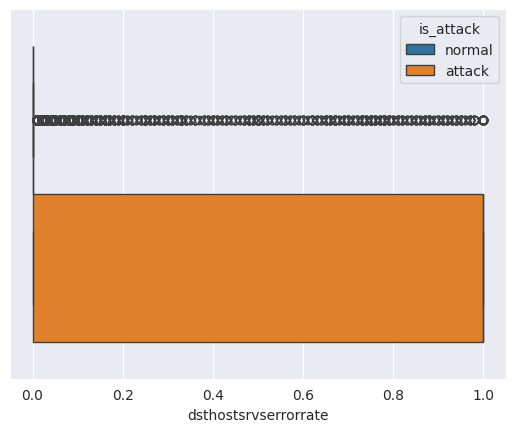

In [179]:
sns.boxplot(data=dhspdf,x='dsthostsrvserrorrate',hue='is_attack')

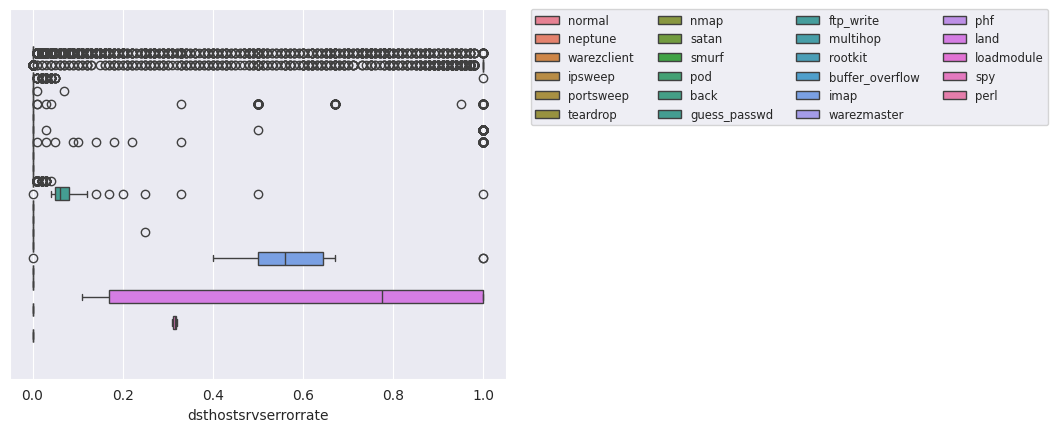

In [180]:
sns.boxplot(data=dhspdf,x='dsthostsrvserrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

In [181]:
df['dsthostsrvrerrorrate'].value_counts()

,count
dsthostsrvrerrorrate,
0.00,106616
1.00,13231
0.01,1390
0.02,580
0.03,352
...,...
0.30,6
0.21,5
0.28,5


<Axes: xlabel='dsthostsrvrerrorrate', ylabel='Density'>

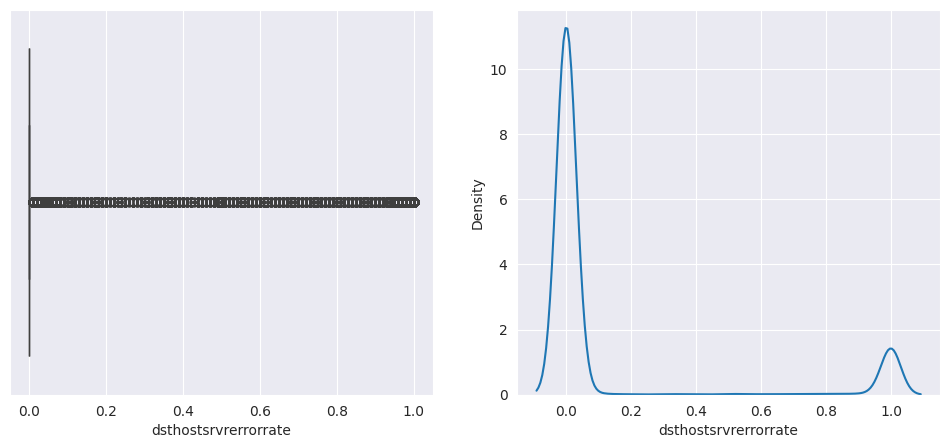

In [182]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='dsthostsrvrerrorrate')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='dsthostsrvrerrorrate')

In [183]:
pd.DataFrame(df['dsthostsrvrerrorrate'].describe()).T

,count,mean,std,min,25%,50%,75%,max
dsthostsrvrerrorrate,125973.0,0.12024,0.319459,0.0,0.0,0.0,0.0,1.0


In [184]:
IQR = np.percentile(df['dsthostsrvrerrorrate'],75)-np.percentile(df['dsthostsrvrerrorrate'],25)
ulimit = np.percentile(df['dsthostsrvrerrorrate'],75) + 1.5*IQR
ulimit

0.0

In [185]:
not_outlier = df[df['dsthostsrvrerrorrate'] <= ulimit]
is_outlier = df[df['dsthostsrvrerrorrate'] > ulimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(84.63400887491764, 15.36599112508236)

In [186]:
not_outlier['is_attack'].value_counts()

,count
is_attack,
normal,61094
attack,45522


In [187]:
is_outlier['is_attack'].value_counts()

,count
is_attack,
attack,13108
normal,6249


In [188]:
# attacks when greater than 50%
df[df['dsthostsrvrerrorrate']>=0.5]['is_attack'].value_counts()

,count
is_attack,
attack,12117
normal,3125


In [189]:
# attacks when greater than 50%
df[df['dsthostsrvrerrorrate']<0.5]['is_attack'].value_counts()

,count
is_attack,
normal,64218
attack,46513


In [190]:
dhsrdf = df.copy()
# bin the data into 4 groups
dhsrdf['bins'] = None
for i in range(len(dhsrdf)):
  ser = dhsrdf.loc[i,'dsthostsrvrerrorrate']
  if ser < 0.25:
    dhsrdf.loc[i,'bins'] = 1
  elif ser >= 0.25 and ser < 0.5:
    dhsrdf.loc[i,'bins'] = 2
  elif ser >= 0.5 and ser < 0.75:
    dhsrdf.loc[i,'bins'] = 3
  else:
    dhsrdf.loc[i,'bins'] = 4

In [191]:
dhsrdf['bins'].value_counts()

,count
bins,
1,110355
4,14603
3,639
2,376


In [193]:
# number of attacks across each bin
pd.pivot_table(data=dhsrdf,index='bins',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
bins,,
1,46436,63919
2,77,299
3,89,550
4,12028,2575


In [194]:
# type of attack in each bin : bin 1
pd.pivot_table(data=dhsrdf[dhsrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(1,ascending=False).head(10)

bins,1,2,3,4
attack,,,,
neptune,34327.0,NaN,NaN,6887.0
ipsweep,3179.0,3.0,19.0,398.0
smurf,2646.0,NaN,NaN,NaN
satan,1659.0,NaN,NaN,1974.0
nmap,1493.0,NaN,NaN,NaN
back,905.0,39.0,6.0,6.0
teardrop,892.0,NaN,NaN,NaN
warezclient,890.0,NaN,NaN,NaN
pod,201.0,NaN,NaN,NaN


In [196]:
# type of attack in each bin : bin 2
pd.pivot_table(data=dhsrdf[dhsrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(2,ascending=False).head()

bins,1,2,3,4
attack,,,,
back,905.0,39.0,6.0,6.0
portsweep,121.0,34.0,62.0,2714.0
ipsweep,3179.0,3.0,19.0,398.0
rootkit,9.0,1.0,NaN,NaN
buffer_overflow,30.0,NaN,NaN,NaN


In [197]:
# type of attack in each bin : bin 3
pd.pivot_table(data=dhsrdf[dhsrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(3,ascending=False).head()

bins,1,2,3,4
attack,,,,
portsweep,121.0,34.0,62.0,2714.0
ipsweep,3179.0,3.0,19.0,398.0
back,905.0,39.0,6.0,6.0
guess_passwd,2.0,NaN,2.0,49.0
buffer_overflow,30.0,NaN,NaN,NaN


In [199]:
# type of attack in each bin : bin 4
pd.pivot_table(data=dhsrdf[dhsrdf['attack'] != 'normal'],index='attack',columns='bins',values='duration',aggfunc='count').sort_values(4,ascending=False).head(8)

bins,1,2,3,4
attack,,,,
neptune,34327.0,NaN,NaN,6887.0
portsweep,121.0,34.0,62.0,2714.0
satan,1659.0,NaN,NaN,1974.0
ipsweep,3179.0,3.0,19.0,398.0
guess_passwd,2.0,NaN,2.0,49.0
back,905.0,39.0,6.0,6.0
buffer_overflow,30.0,NaN,NaN,NaN
ftp_write,8.0,NaN,NaN,NaN


In [200]:
# detailed sub binning under bin 1, find the value after which attacks rise
dhsrdf['cbin2'] = None
for i in range(len(dhsrdf)):
  ser = dhsrdf.loc[i,'dsthostsrvrerrorrate']
  if ser < 0.05:
    dhsrdf.loc[i,'cbin2'] = 1
  elif ser >= 0.05 and ser < 0.1:
    dhsrdf.loc[i,'cbin2'] = 2
  elif ser >= 0.1 and ser < 0.15:
    dhsrdf.loc[i,'cbin2'] = 3
  elif ser >= 0.15 and ser < 0.20:
    dhsrdf.loc[i,'cbin2'] = 4
  elif ser >= 0.20 and ser < 0.25:
    dhsrdf.loc[i,'cbin2'] = 5
  else:
    dhsrdf.loc[i,'cbin2'] = 6

In [201]:
dhsrdf['cbin2'].value_counts()

,count
cbin2,
1,109282
6,15618
2,738
3,174
4,96
5,65


In [203]:
# number of attacks across each sub bin
pd.pivot_table(data=dhsrdf,index='cbin2',columns='is_attack',values='duration',aggfunc='count')

is_attack,attack,normal
cbin2,,
1,46059,63223
2,293,445
3,23,151
4,42,54
5,19,46
6,12194,3424


<Axes: xlabel='dsthostsrvrerrorrate'>

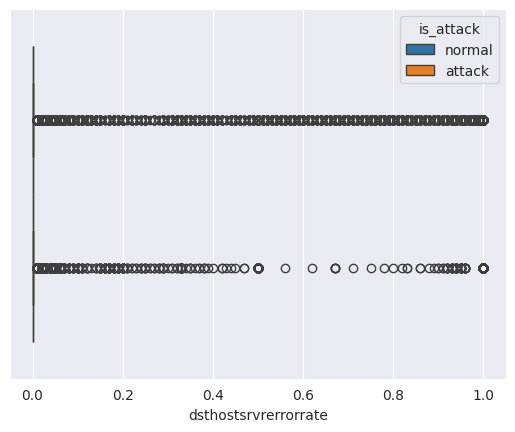

In [206]:
sns.boxplot(data=dhspdf,x='dsthostsrvrerrorrate',hue='is_attack')

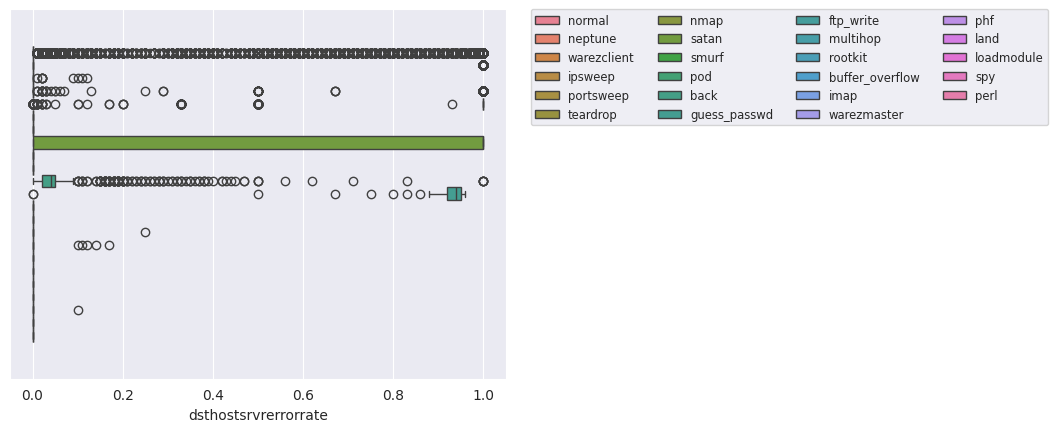

In [207]:
sns.boxplot(data=dhspdf,x='dsthostsrvrerrorrate',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

In [208]:
df['lastflag'].value_counts()

,count
lastflag,
21,62557
18,20667
20,19339
19,10284
15,3990
17,3074
16,2393
12,729
14,674


In [209]:
df['lastflag'].nunique()

22

<Axes: xlabel='lastflag', ylabel='Density'>

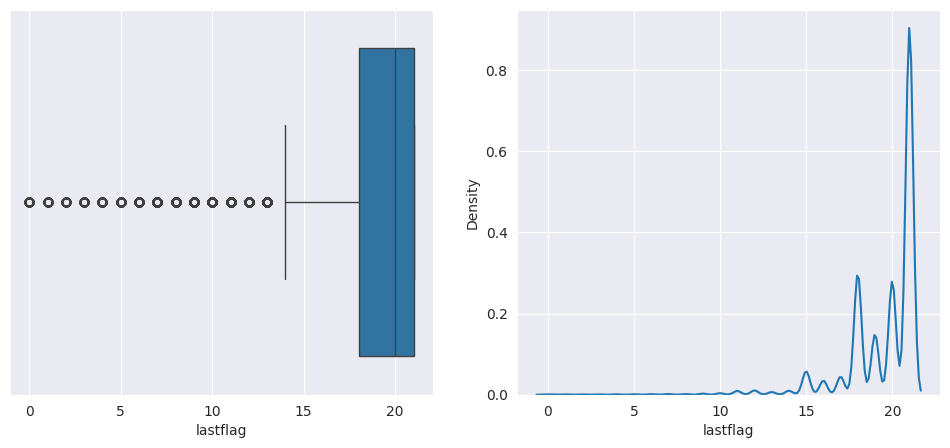

In [210]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,x='lastflag')
plt.subplot(1,2,2)
sns.kdeplot(data=df,x='lastflag')

In [211]:
pd.DataFrame(df['lastflag'].describe()).T

,count,mean,std,min,25%,50%,75%,max
lastflag,125973.0,19.50406,2.291503,0.0,18.0,20.0,21.0,21.0


In [217]:
IQR = np.percentile(df['lastflag'],75)-np.percentile(df['lastflag'],25)
llimit = np.percentile(df['lastflag'],25) - 1.5*IQR
llimit

13.5

In [219]:
not_outlier = df[df['lastflag'] >= llimit]
is_outlier = df[df['lastflag'] < llimit]
total_data = df.shape[0]
(not_outlier.shape[0]/total_data)*100, (is_outlier.shape[0]/total_data)*100

(97.62250641010375, 2.3774935898962473)

In [222]:
not_outlier.shape[0],is_outlier.shape[0]

(122978, 2995)

In [220]:
not_outlier['is_attack'].value_counts()

,count
is_attack,
normal,66891
attack,56087


In [221]:
is_outlier['is_attack'].value_counts()

,count
is_attack,
attack,2543
normal,452


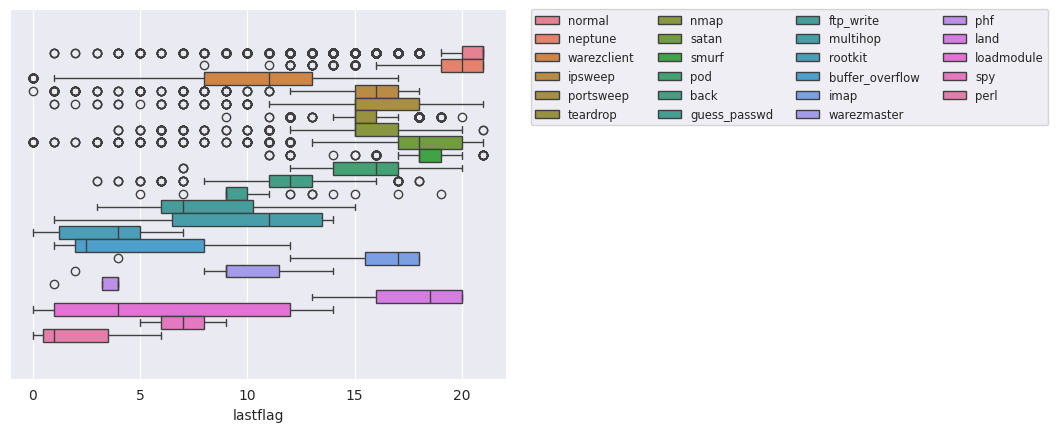

In [223]:
sns.boxplot(data=dhspdf,x='lastflag',hue='attack')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,ncols=4,fontsize='small')

In [225]:
# number of attacks across each bin
pd.pivot_table(data=df,index='is_attack',columns='lastflag',values='duration',aggfunc='count')

lastflag,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
is_attack,,,,,,,,,,,,,,,,,,,,,,
attack,66.0,59.0,52.0,61.0,70.0,66.0,88.0,96.0,93.0,149.0,213.0,582.0,608.0,340.0,352.0,3760.0,2086.0,1941.0,13591.0,8511.0,12453.0,13393.0
normal,NaN,3.0,2.0,4.0,9.0,15.0,8.0,22.0,13.0,45.0,40.0,59.0,121.0,111.0,322.0,230.0,307.0,1133.0,7076.0,1773.0,6886.0,49164.0


In [226]:
ldf = pd.pivot_table(data=df,index='lastflag',columns='is_attack',values='duration',aggfunc='count')
ldf[ldf['normal'] > ldf['attack']]

is_attack,attack,normal
lastflag,,
21,13393.0,49164.0


In [228]:
df[df['lastflag'] == 21]['attack'].value_counts()

,count
attack,
normal,49164
neptune,13264
satan,83
portsweep,30
smurf,14
nmap,2


In [232]:
df[df['attack'] == 'normal']['lastflag'].value_counts()

,count
lastflag,
21,49164
18,7076
20,6886
19,1773
17,1133
14,322
16,307
15,230
12,121


In [233]:
df[df['attack'] != 'normal']['lastflag'].value_counts()

,count
lastflag,
18,13591
21,13393
20,12453
19,8511
15,3760
16,2086
17,1941
12,608
11,582
